**Assignment 2 :**
**Data Classification**


Names:

Ahmed Abd Elrahman Anwar (6)

Abd Elrahman Shams (39)

## **Imports**

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import accuracy_score as acc
from sklearn import metrics

## ***Loading DataSet***

In [0]:
# load training data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset = pd.read_csv(url)
attributes = ['ID', 'diagnosis', 'radius_mean', 'texture_mean',
                    'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
                    'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
                    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
                    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                    'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
                    

dataset.columns = attributes
dataset.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Splitting data

In [0]:
#spliting dataset into train and test data

from sklearn.model_selection import train_test_split 
train, test = train_test_split(dataset, test_size=0.3, stratify=dataset['diagnosis'])

display(train)
display(test)

train = np.array(train)
test = np.array(test)

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
142,869224,B,12.900,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.030880,0.1778,0.06235,0.2143,0.7712,1.689,16.64,0.005324,0.01563,0.01510,0.007584,0.021040,0.001887,14.48,21.82,97.17,643.8,0.13120,0.25480,0.20900,0.10120,0.3549,0.08118
386,902976,B,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.12,0.003728,0.01415,0.01988,0.007016,0.016470,0.001970,15.51,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623
542,922296,B,13.210,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.032750,0.1628,0.05781,0.2351,1.5970,1.539,17.85,0.004973,0.01372,0.01498,0.009117,0.017240,0.001343,14.37,37.17,92.48,629.6,0.10720,0.13810,0.10620,0.07958,0.2473,0.06443
37,855133,M,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.01094,0.01818,0.019170,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
455,9112366,B,11.630,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.020170,0.1799,0.06166,0.3135,2.4260,2.150,23.13,0.009861,0.02418,0.04275,0.009215,0.024750,0.002128,13.12,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,852781,M,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.077310,0.1697,0.05699,0.8529,1.8490,5.632,93.54,0.010750,0.02722,0.05081,0.019110,0.022930,0.004217,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
34,854253,M,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.060180,0.1896,0.05656,0.4615,0.9197,3.008,45.19,0.005776,0.02499,0.03695,0.011950,0.027890,0.002665,20.01,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633
76,8610637,M,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.108000,0.2152,0.06673,0.9806,0.5505,6.311,134.80,0.007940,0.05839,0.04658,0.020700,0.025910,0.007054,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
503,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.052520,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.04542,0.03483,0.021880,0.025420,0.010450,10.28,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520


,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
182,873843,B,11.410,14.92,73.53,402.0,0.09059,0.08155,0.061810,0.023610,0.1167,0.06217,0.3344,1.1080,1.9020,22.770,0.007356,0.037280,0.059150,0.017120,0.02165,0.004784,12.370,17.70,79.12,467.2,0.11210,0.16100,0.16480,0.06296,0.1811,0.07427
170,87163,M,13.430,19.63,85.84,565.4,0.09048,0.06288,0.058580,0.034380,0.1598,0.05671,0.4697,1.1470,3.1420,43.400,0.006003,0.010630,0.021510,0.009443,0.01520,0.001868,17.980,29.87,116.60,993.6,0.14010,0.15460,0.26440,0.11600,0.2884,0.07371
231,88203002,B,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,0.2239,1.6470,1.4890,15.460,0.004359,0.006813,0.003223,0.003419,0.01916,0.002534,12.360,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
462,911320501,B,11.600,18.36,73.88,412.7,0.08508,0.05855,0.033670,0.017770,0.1516,0.05859,0.1816,0.7656,1.3030,12.890,0.006709,0.017010,0.020800,0.007497,0.02124,0.002768,12.770,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863
352,9010018,M,15.080,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,0.1647,0.06464,0.6534,1.5060,4.1740,63.370,0.010520,0.024310,0.049120,0.017460,0.02120,0.004867,18.510,33.22,121.20,1050.0,0.16600,0.23560,0.40290,0.15260,0.2654,0.09438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,0.1508,0.05376,0.1302,0.7198,0.8439,10.770,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
45,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,0.1563,0.9567,1.0940,8.205,0.008968,0.016460,0.015880,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
95,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,0.3661,1.5110,2.4100,24.440,0.005433,0.011790,0.011310,0.015190,0.02220,0.003408,12.830,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376
181,873701,M,15.700,20.31,101.20,766.6,0.09597,0.08799,0.065930,0.051890,0.1618,0.05549,0.3699,1.1500,2.4060,40.980,0.004626,0.022630,0.019540,0.009767,0.01547,0.002430,20.110,32.82,129.30,1269.0,0.14140,0.35470,0.29020,0.15410,0.3437,0.08631


## **Data Exploration and Visualization**

In [0]:
dataset.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015063,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032217,0.041765,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### BoxPlot

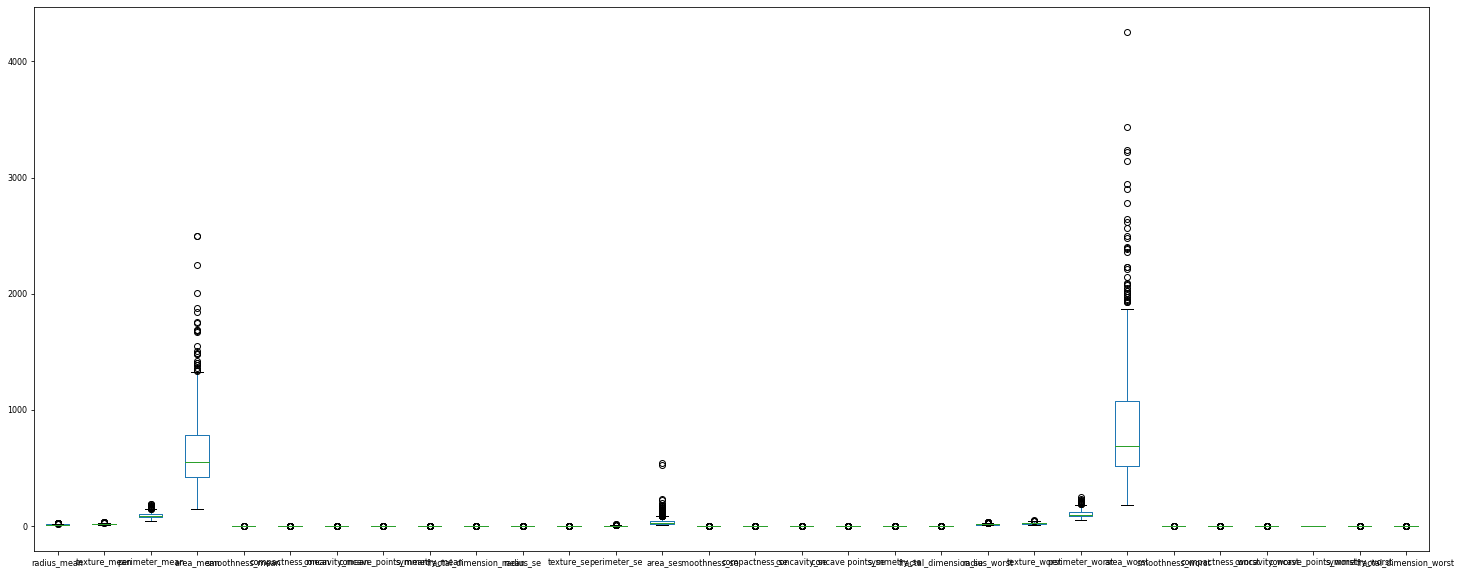

In [0]:
# plot the boxplots for entire dataset
dataset.iloc[:,2:].boxplot(grid=False, fontsize=8, figsize=(25,10))

### Correlation Matrix and Visualization

In [0]:
# Pearson’s correlation Matrix
correlation_matrix = dataset.corr(method='pearson')
display(correlation_matrix)

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
ID,1.000000,0.075166,0.099288,0.073796,0.097390,-0.012343,0.001476,0.051507,0.045472,-0.021284,-0.051808,0.144884,-0.007764,0.139506,0.179768,0.096700,0.034564,0.055569,0.079077,-0.016849,0.026123,0.083457,0.064262,0.081329,0.108408,0.010899,-0.001891,0.024177,0.036300,-0.043371,-0.029157
radius_mean,0.075166,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749,0.678711,-0.096355,0.674190,0.735854,-0.222432,0.203984,0.193099,0.375435,-0.106777,-0.044473,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339
texture_mean,0.099288,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,-0.068771,0.287615,0.385865,0.295219,0.271431,0.005855,0.197833,0.146559,0.166960,0.013387,0.058030,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177
perimeter_mean,0.073796,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,-0.268103,0.690955,-0.085643,0.692689,0.744540,-0.202511,0.248532,0.226890,0.406473,-0.084416,-0.007568,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909
area_mean,0.097390,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,0.148219,-0.288560,0.732879,-0.065375,0.727493,0.800829,-0.166555,0.210802,0.206677,0.371635,-0.074638,-0.021493,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382
smoothness_mean,-0.012343,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,0.555259,0.582435,0.296856,0.070139,0.290958,0.241523,0.333703,0.316475,0.247046,0.379820,0.198262,0.281917,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684
compactness_mean,0.001476,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,0.598095,0.560161,0.490415,0.049963,0.541495,0.447968,0.137857,0.739278,0.572048,0.644837,0.225748,0.507276,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961
concavity_mean,0.051507,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,0.495525,0.329768,0.627609,0.079374,0.655856,0.612945,0.100190,0.669304,0.692510,0.684690,0.173926,0.448172,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
concave_points_mean,0.045472,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,0.457171,0.158464,0.694661,0.024143,0.707006,0.686826,0.028772,0.488058,0.438624,0.616413,0.090848,0.255168,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277
symmetry_mean,-0.021284,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,1.000000,0.475301,0.296561,0.130864,0.306324,0.216374,0.188984,0.418973,0.341438,0.392571,0.447109,0.329914,0.179703,0.096533,0.212084,0.170721,0.424045,0.467830,0.429023,0.425146,0.696745,0.434165


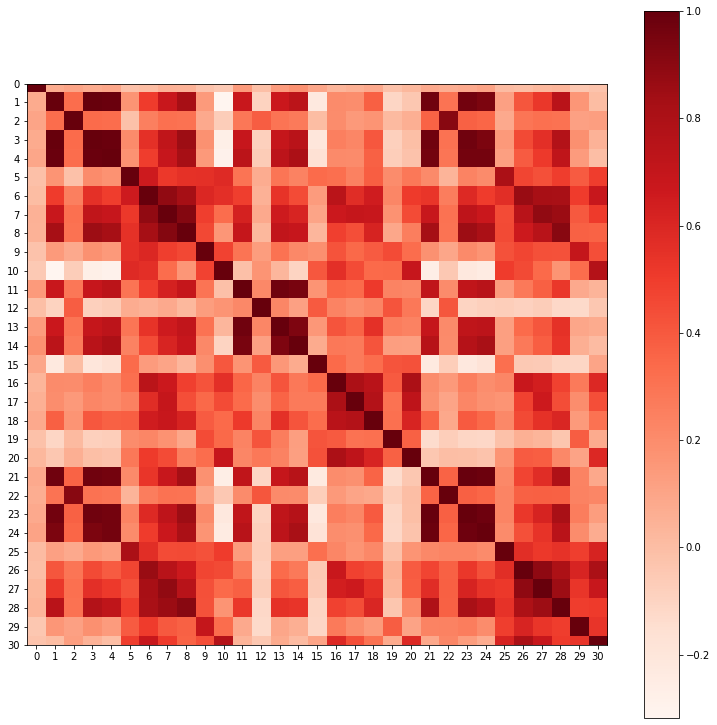

In [0]:
def visualize_matrix(matrix, norm=False):
  fig = plt.figure(figsize = (13,13))
  if norm==False:
    plt.imshow(matrix, cmap='Reds')
  else:
    plt.imshow(matrix, cmap='Reds', vmin=0, vmax=1)
  plt.colorbar()
  plt.xticks([i for i in range(0,matrix.shape[0])])
  plt.yticks([i for i in range(0,matrix.shape[0])])

visualize_matrix(correlation_matrix)

## **Histogram plot**

In [0]:
def plot_hist(x, _bins, title, features, x_label="Feature Value", y_label="Value Frequency"):
    
    plt.figure(figsize=[20,10])
    plt.hist(x, bins=_bins, histtype='bar', label = features)
    plt.legend()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

In [0]:
# find all classes in data set
detected_class = np.array(list(set(np.array(dataset)[:, 1])))
print('classes : {}'.format(detected_class))

classes : ['M' 'B']


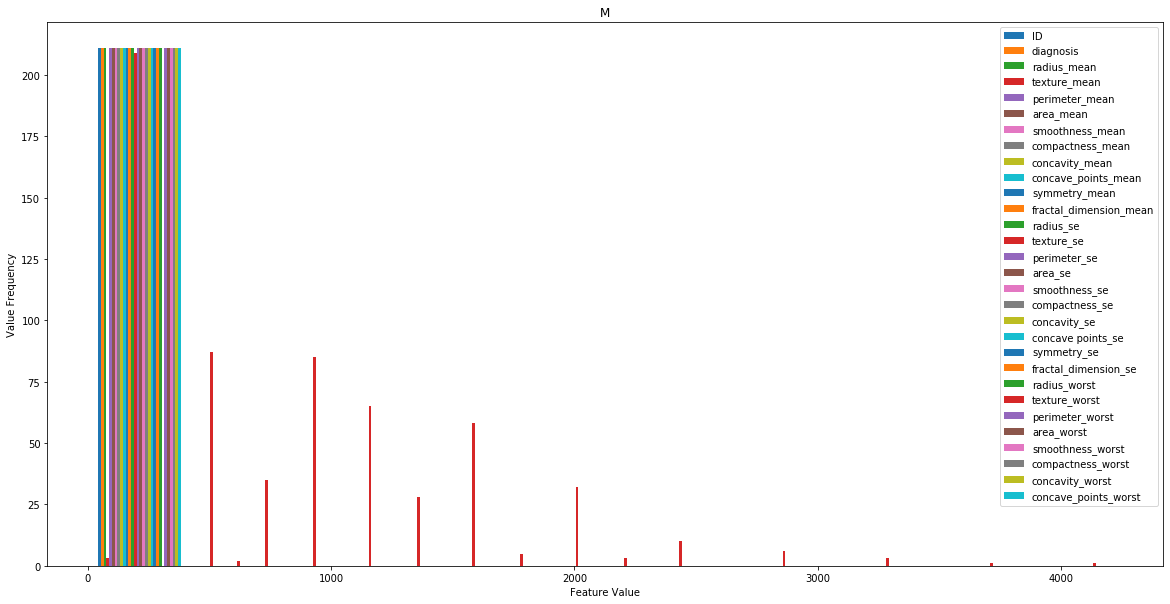

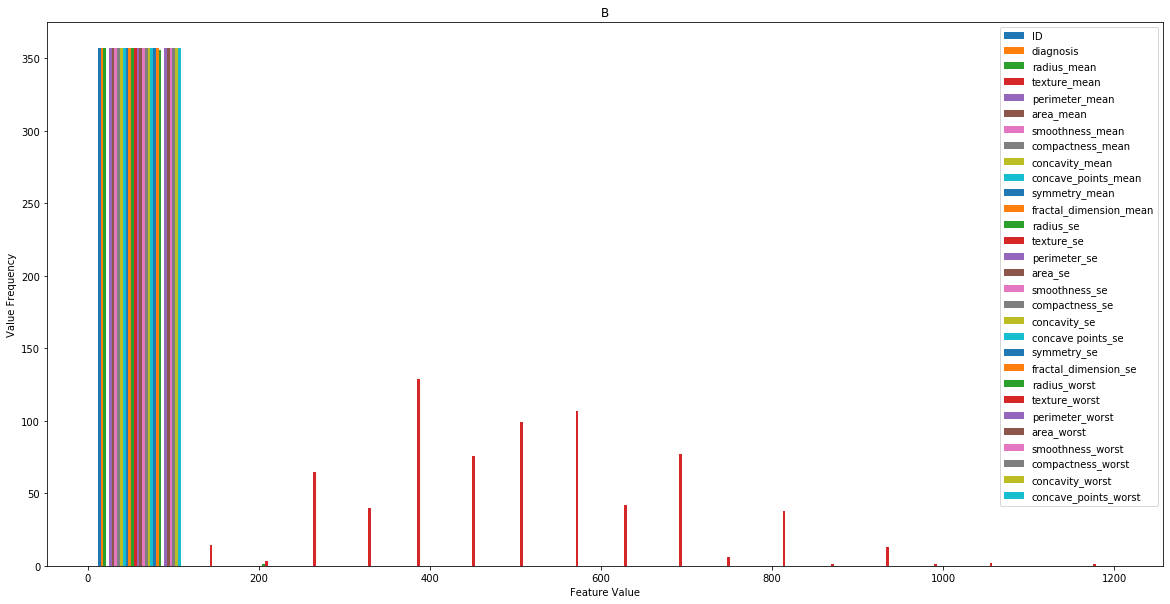

In [0]:
#histogram for all attributes

data_set = np.array(dataset)
for obj in detected_class:
    obj_features = data_set[:][data_set[:,1] == obj] 
    plot_hist(obj_features[:,2:], 10, obj,attributes)

#### Plotting histogram for individual attributes

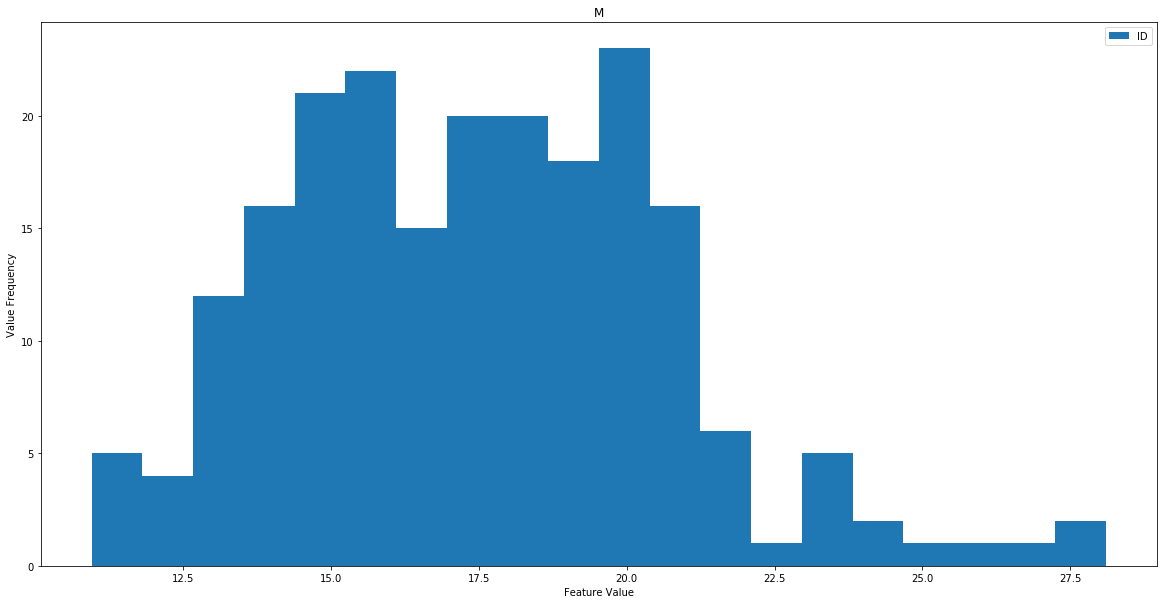

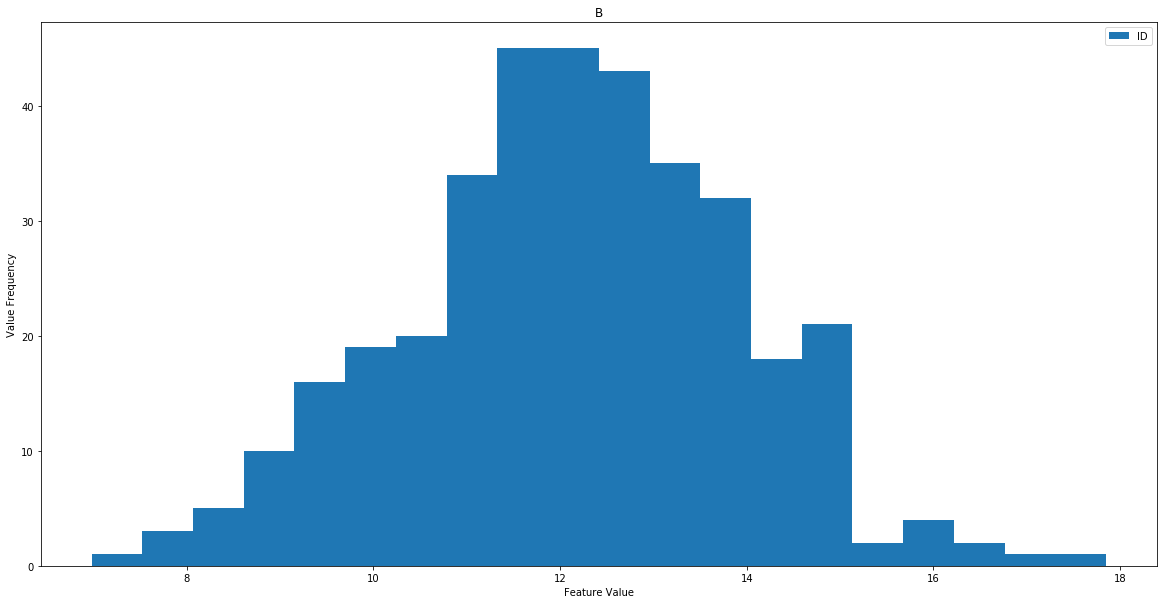

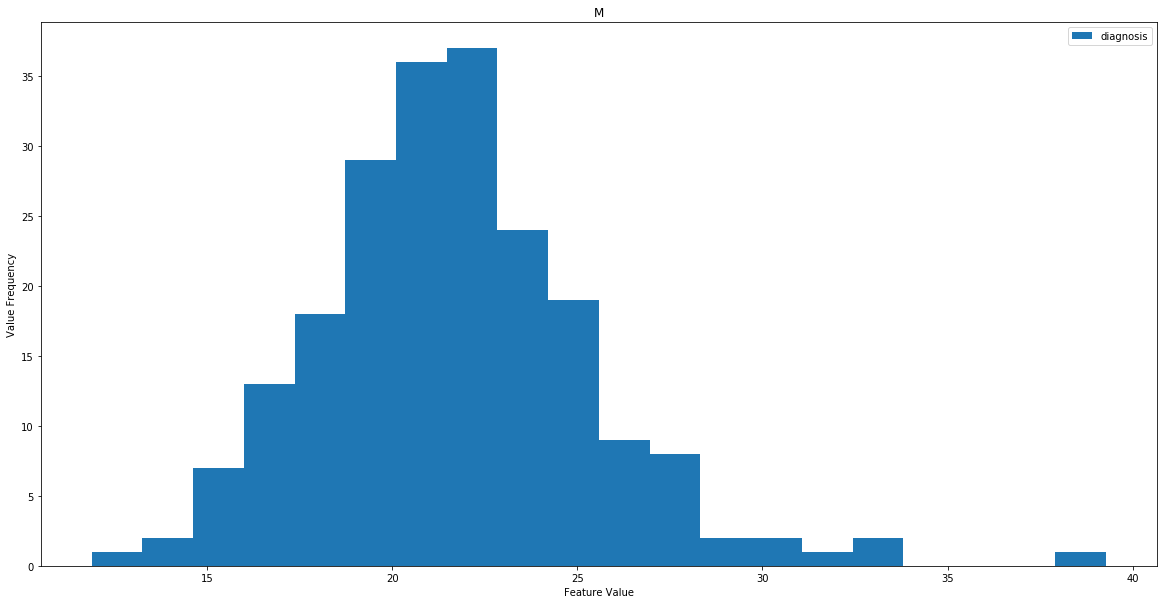

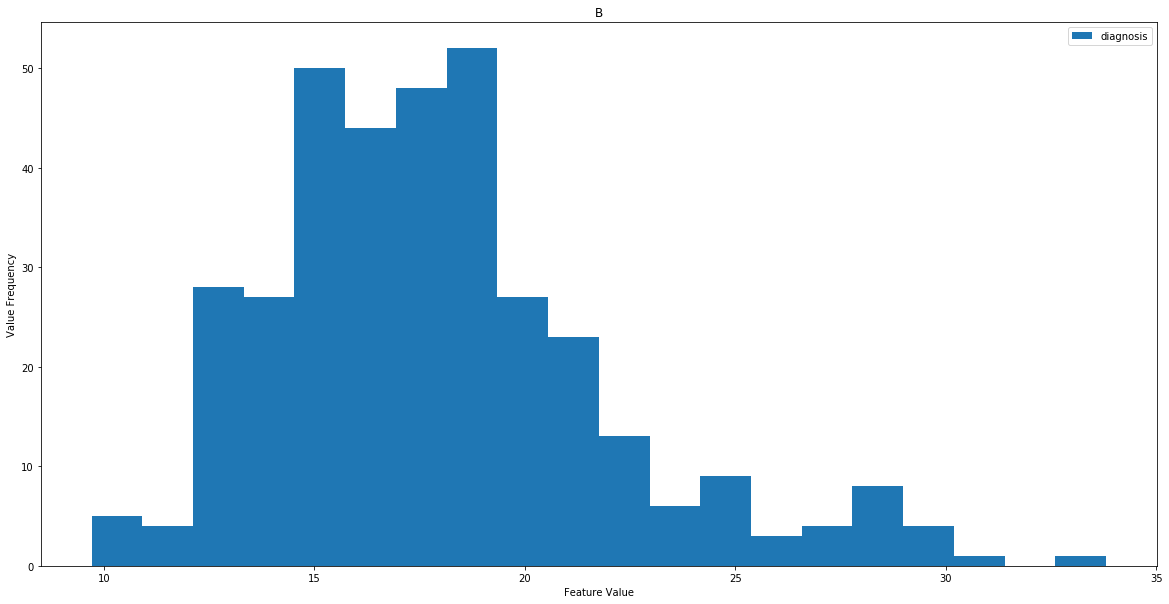

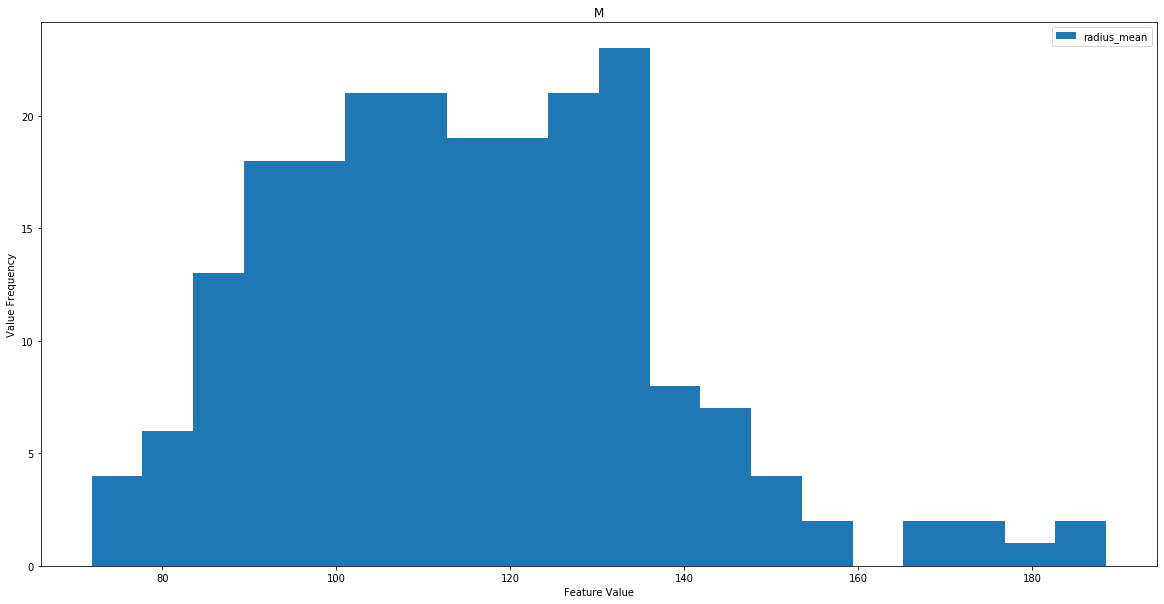

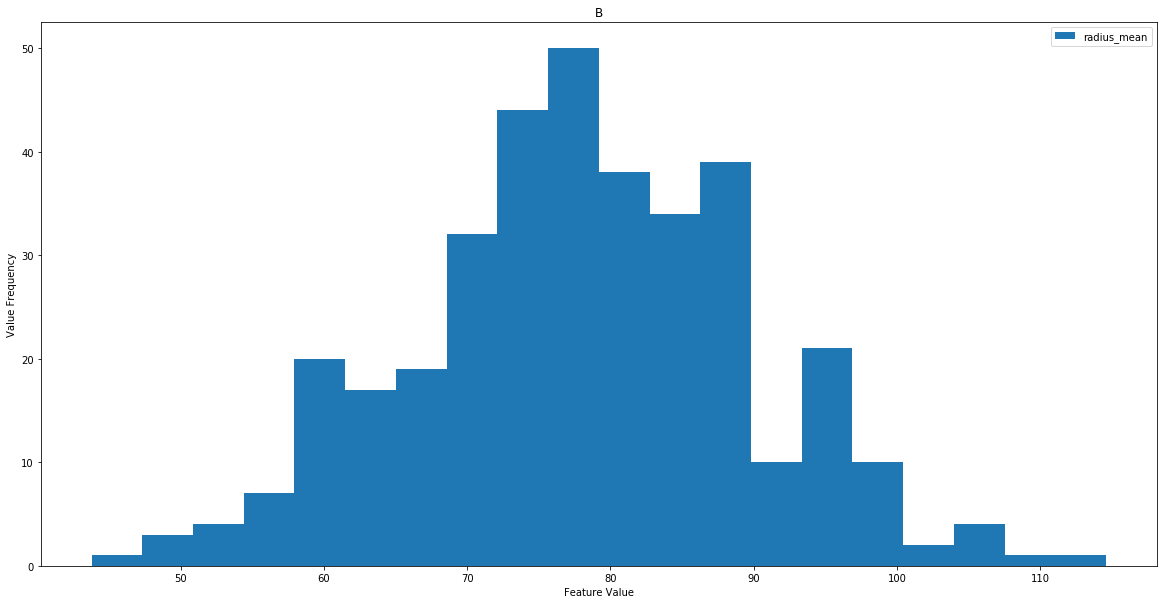

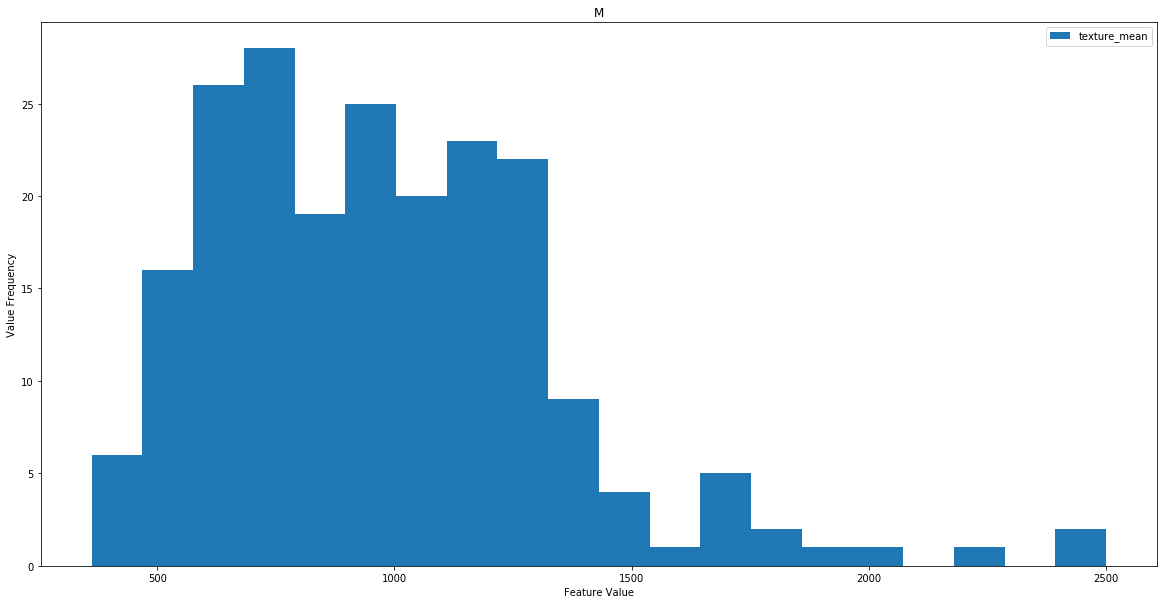

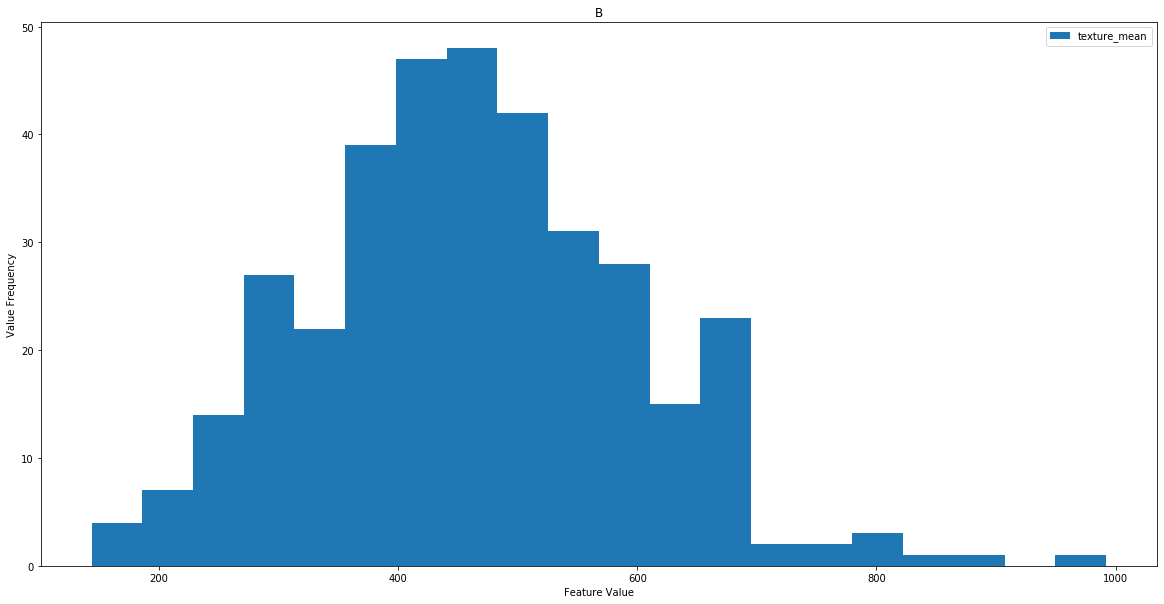

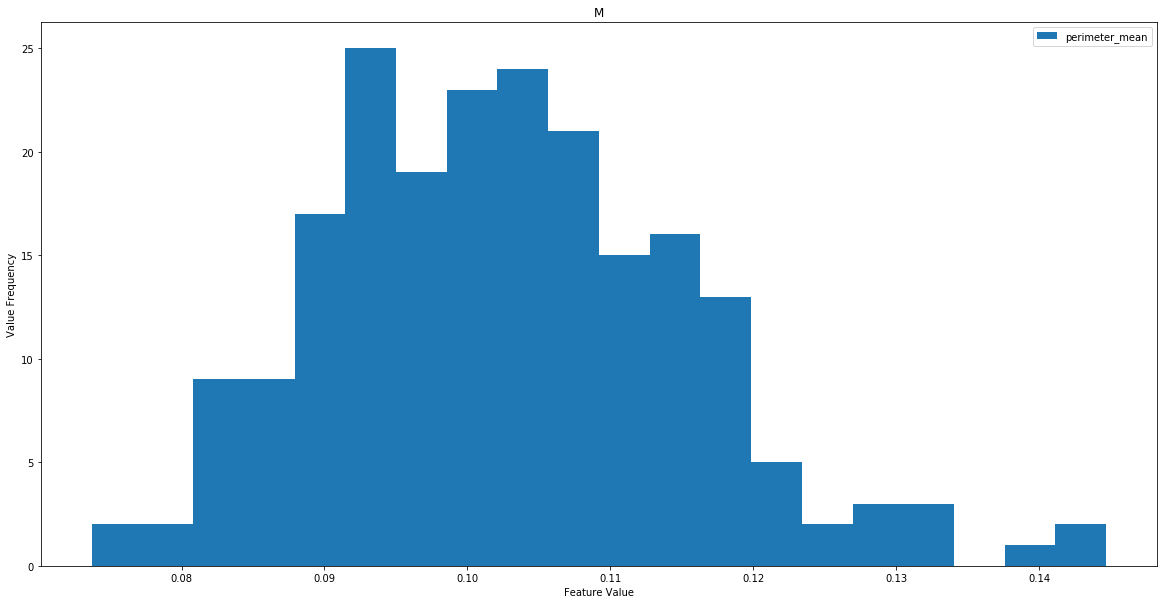

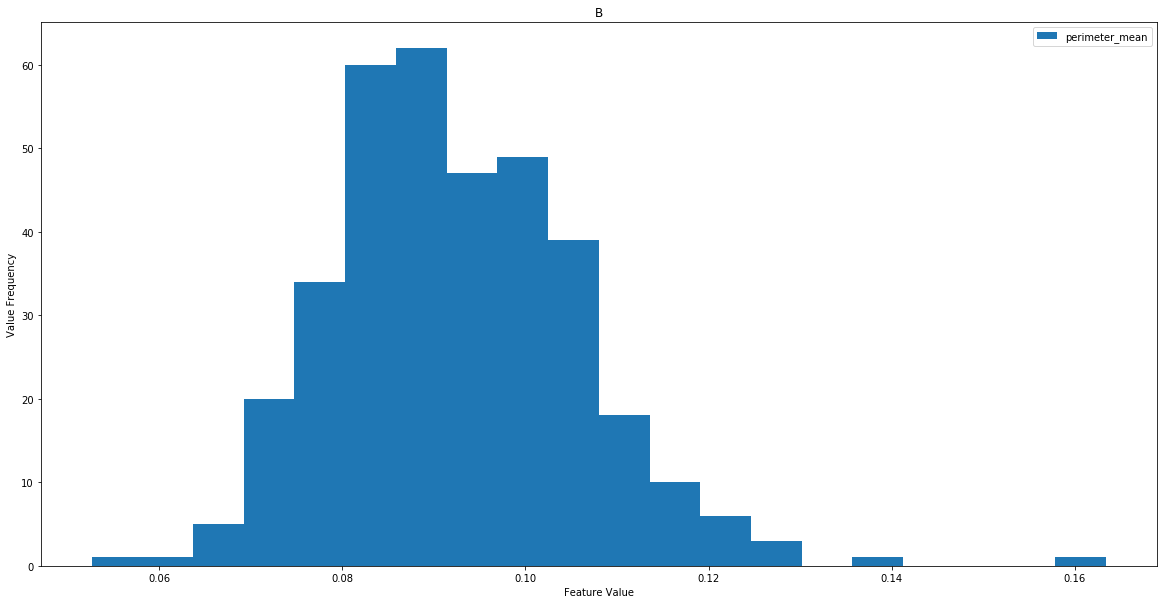

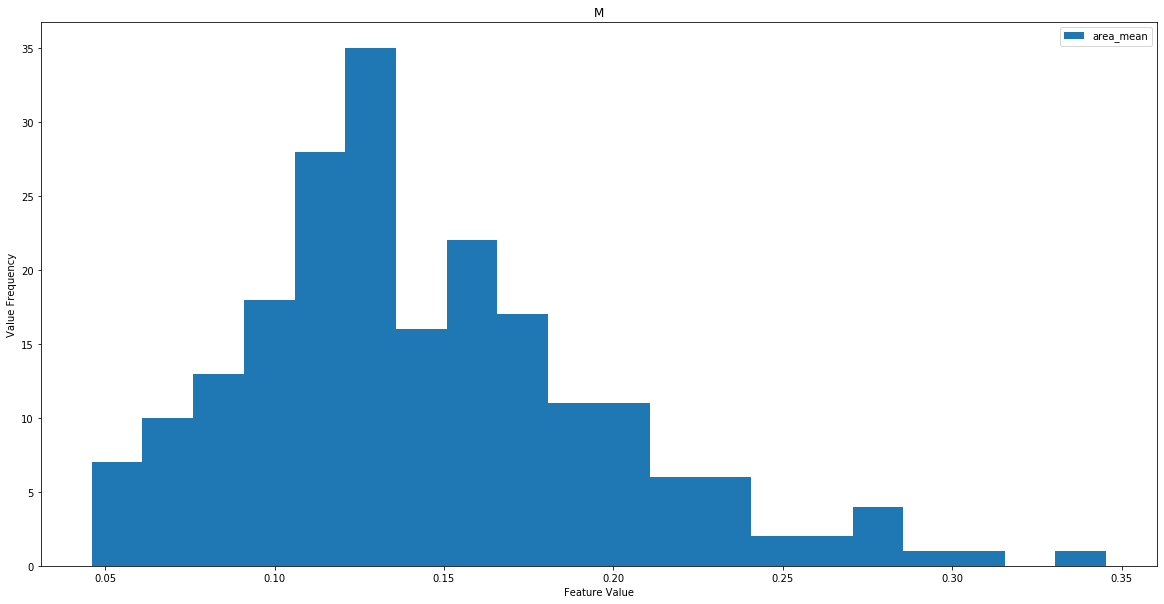

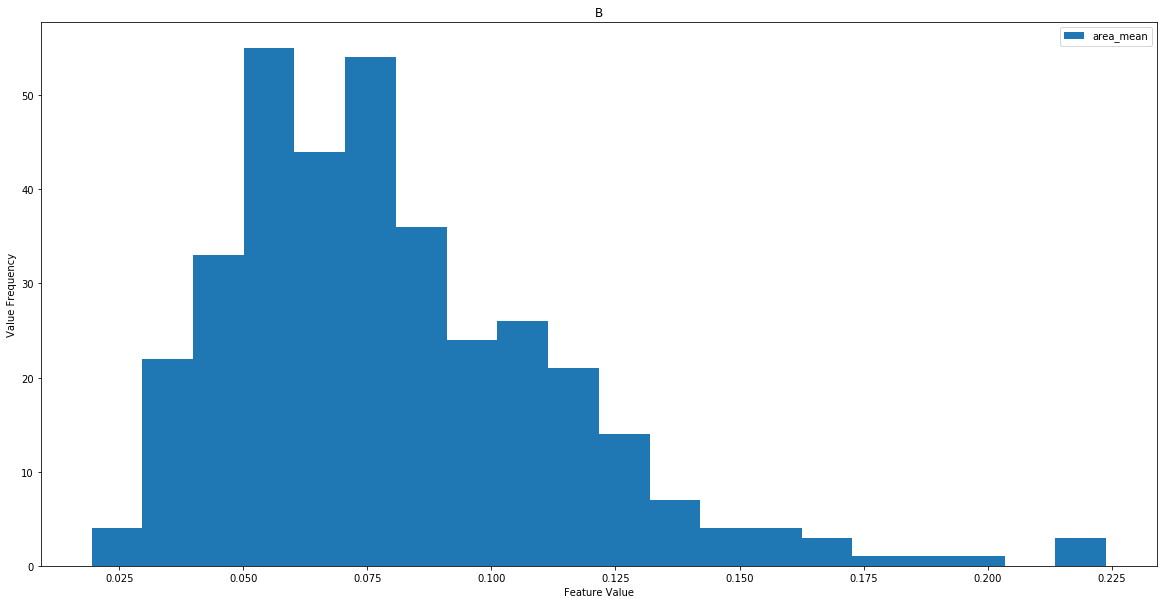

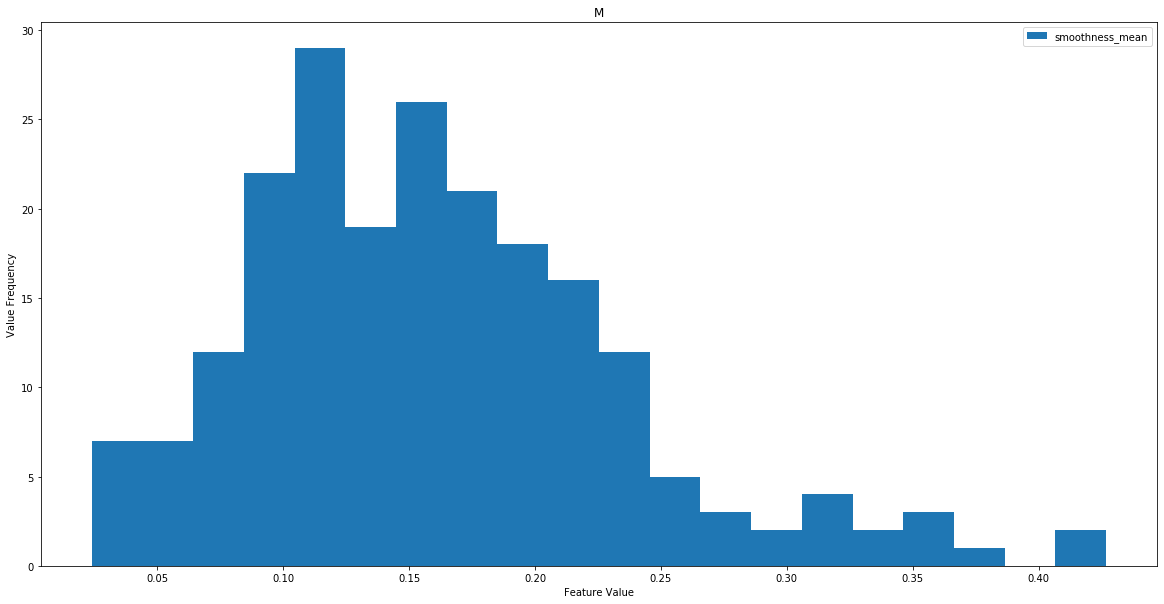

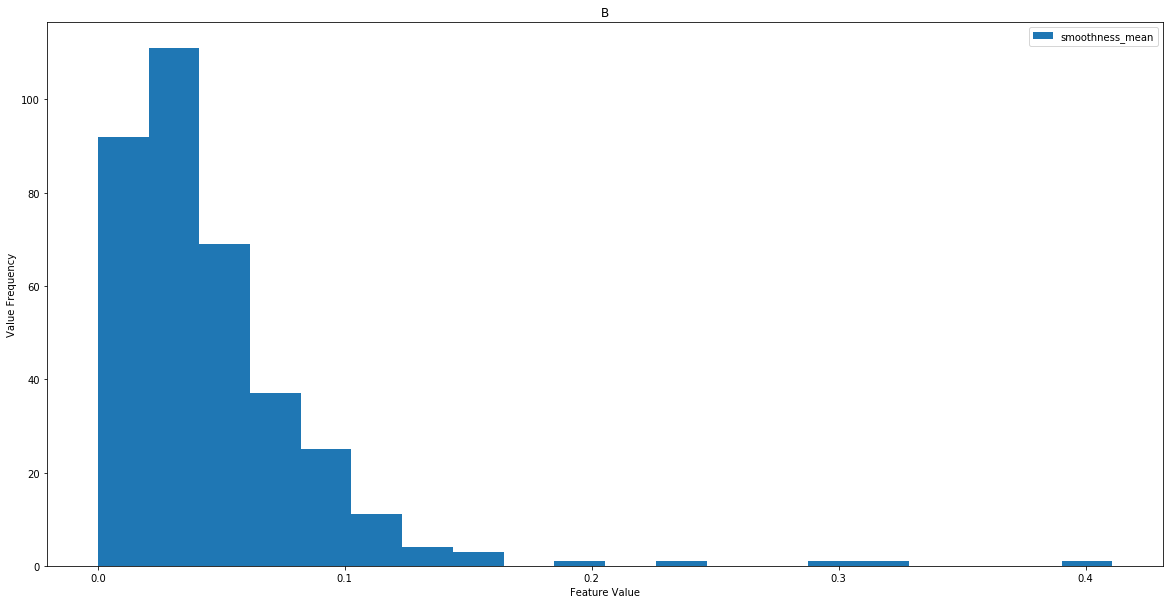

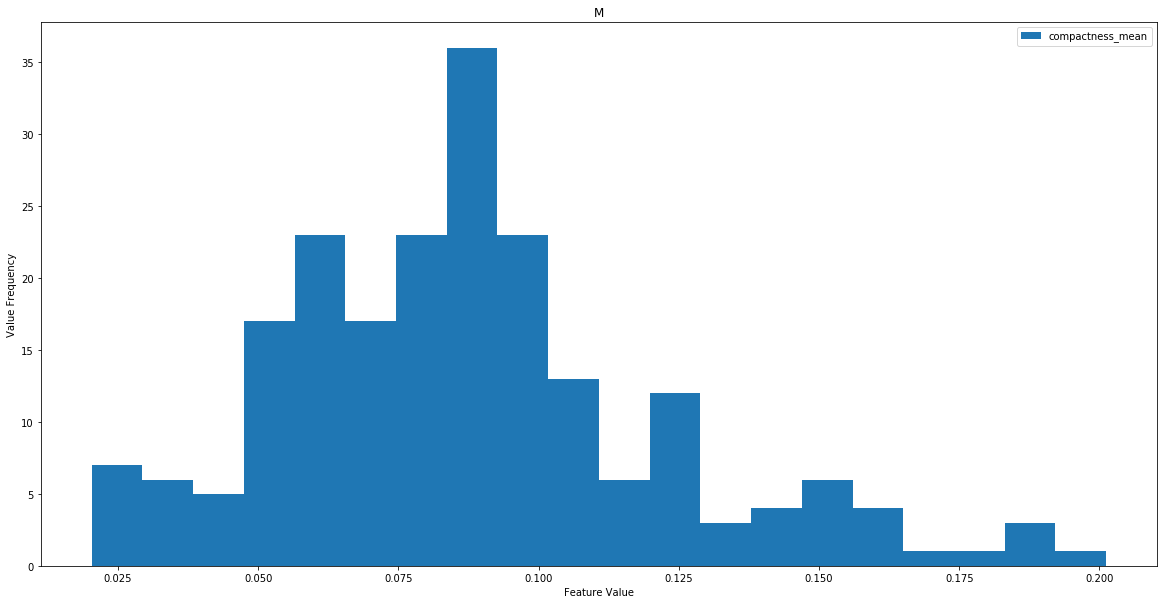

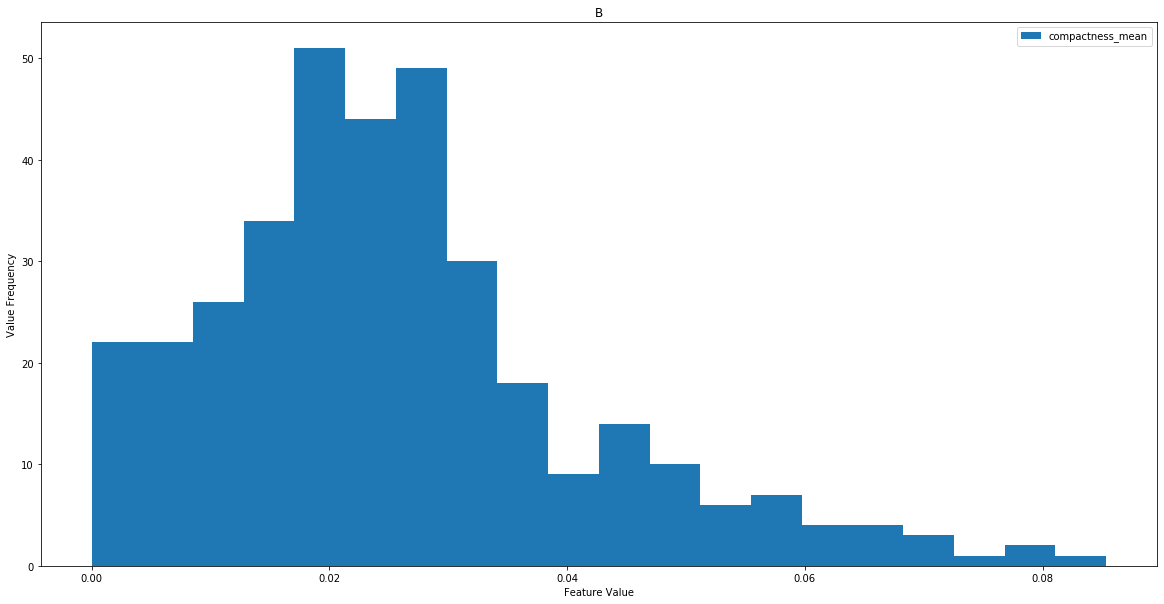

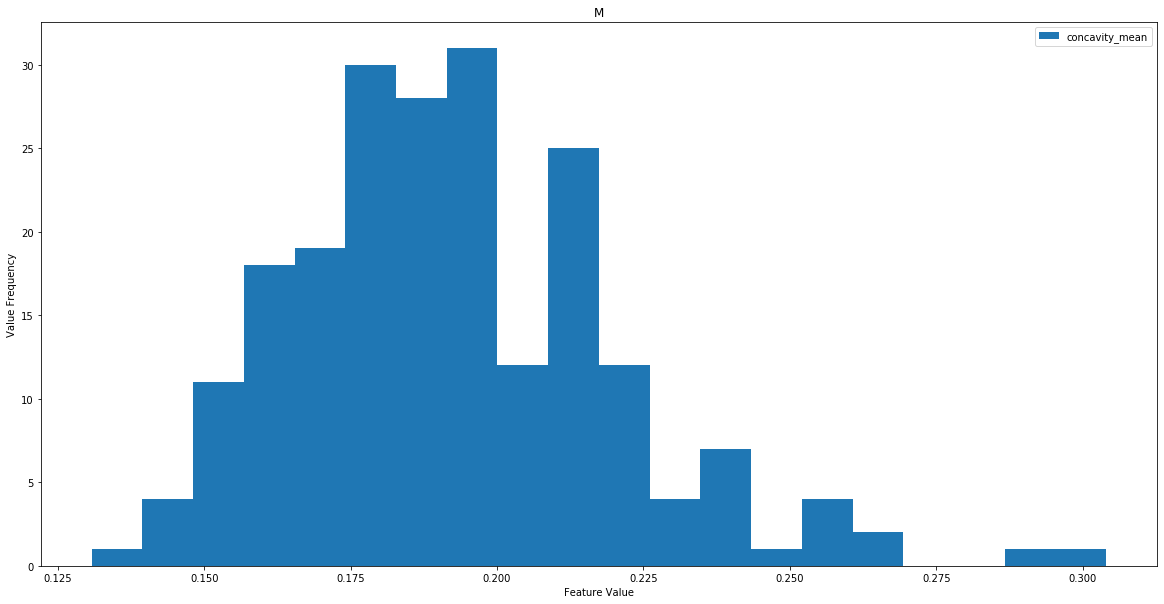

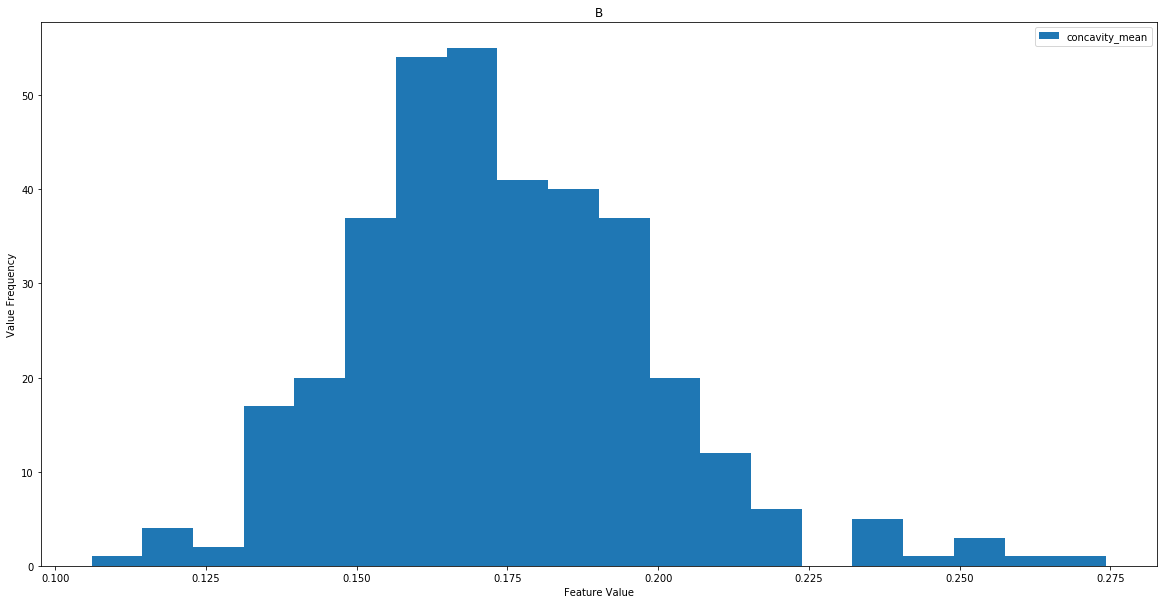

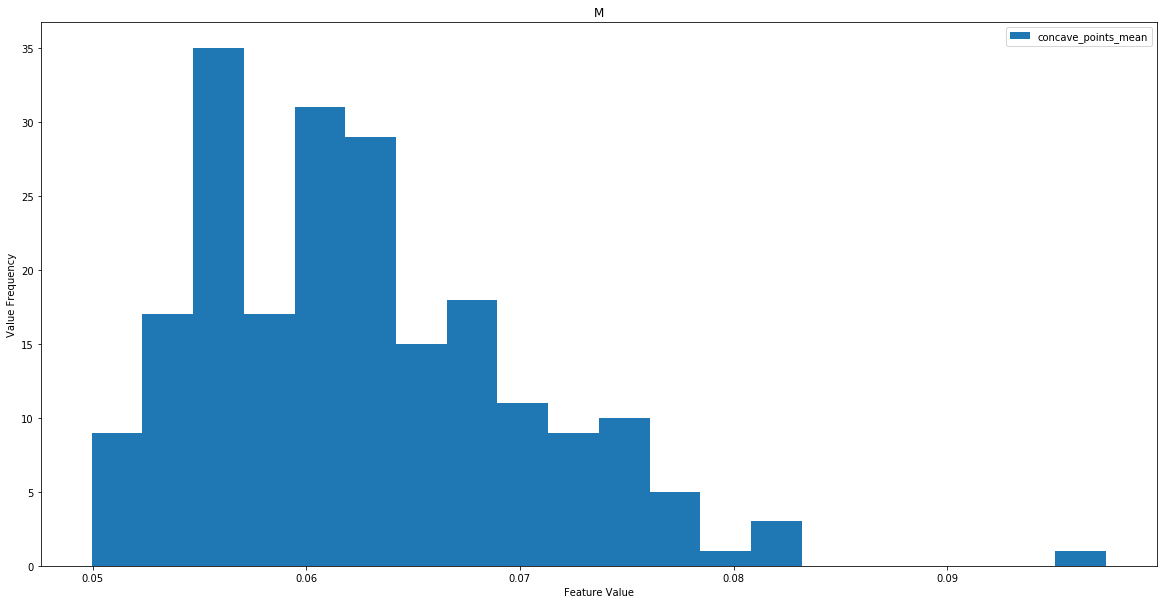

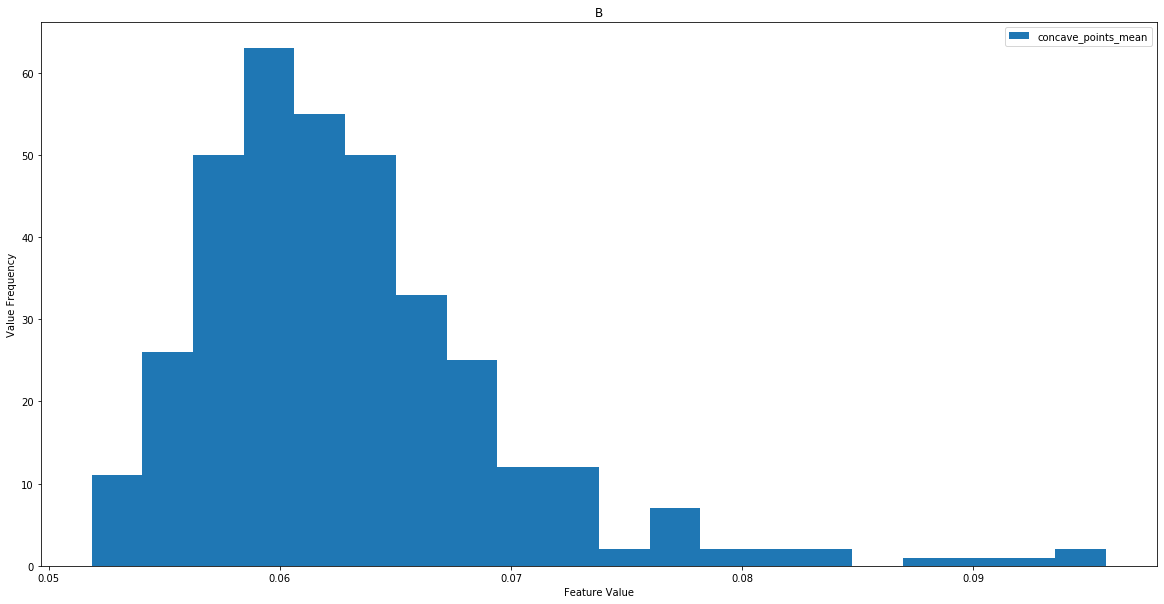

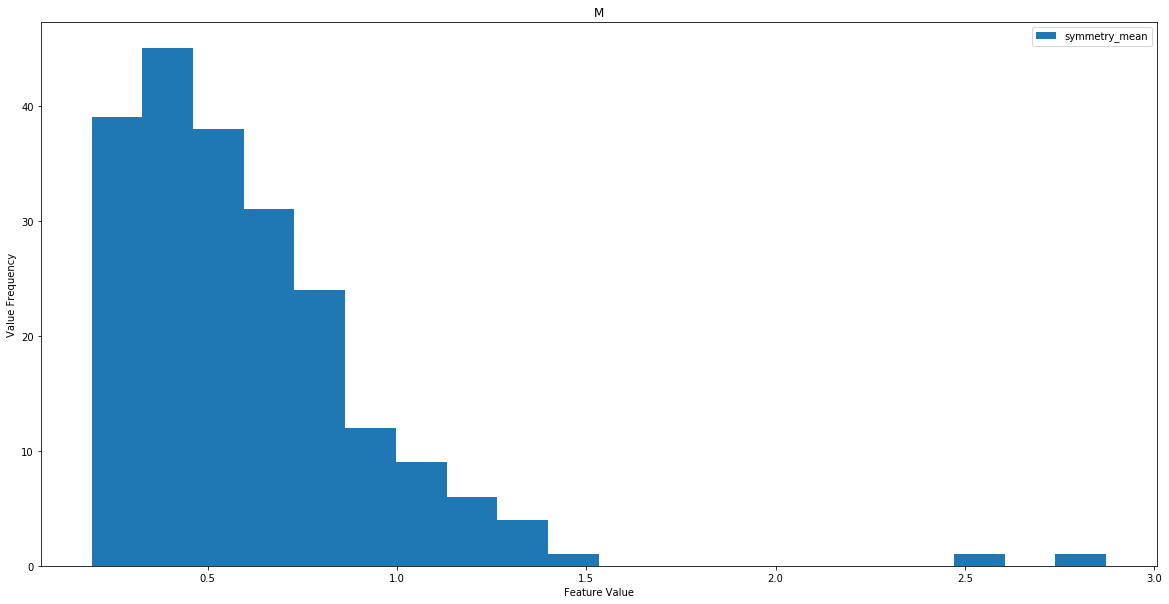

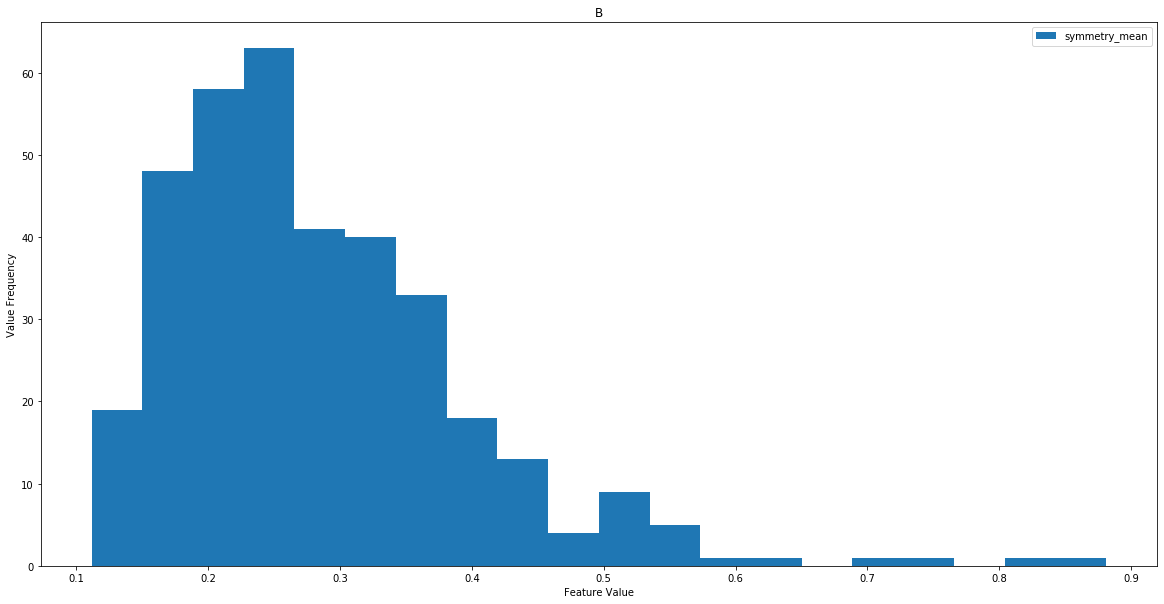

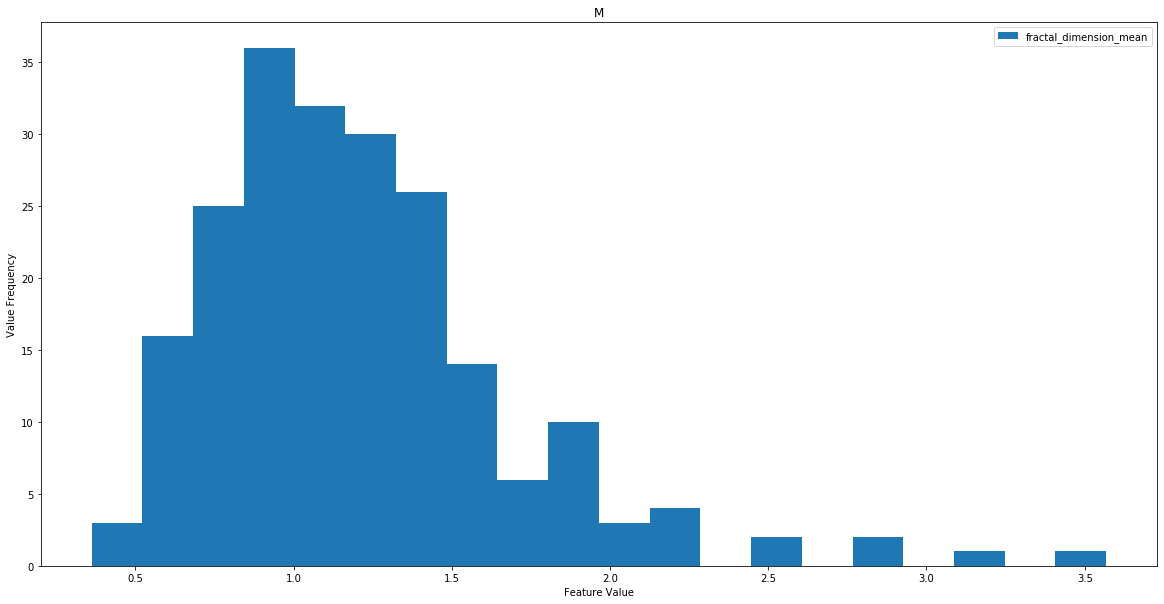

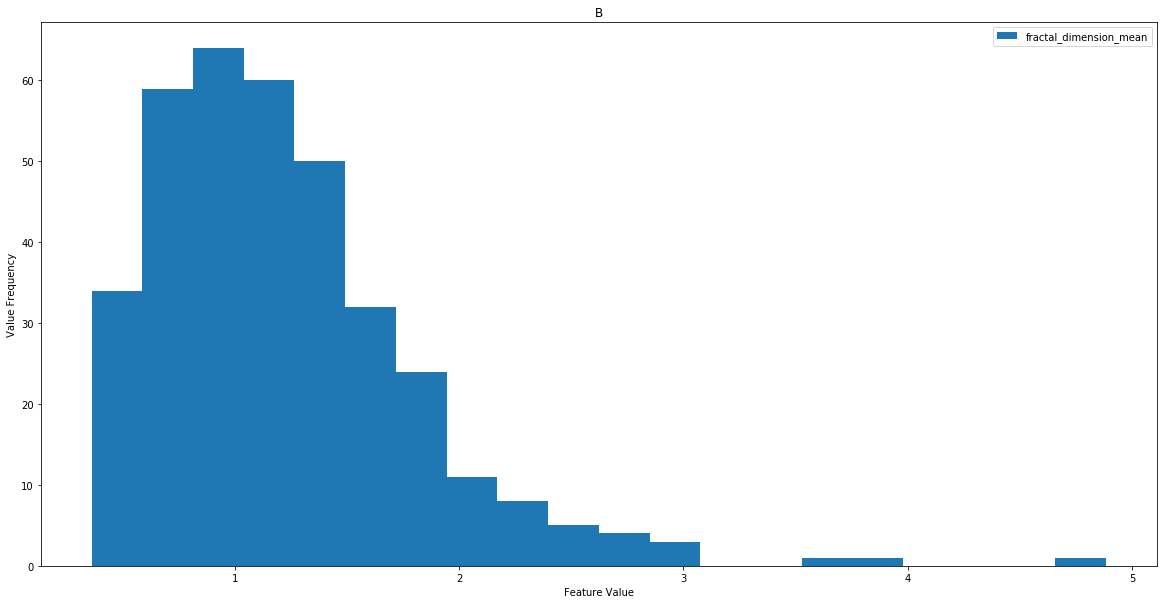

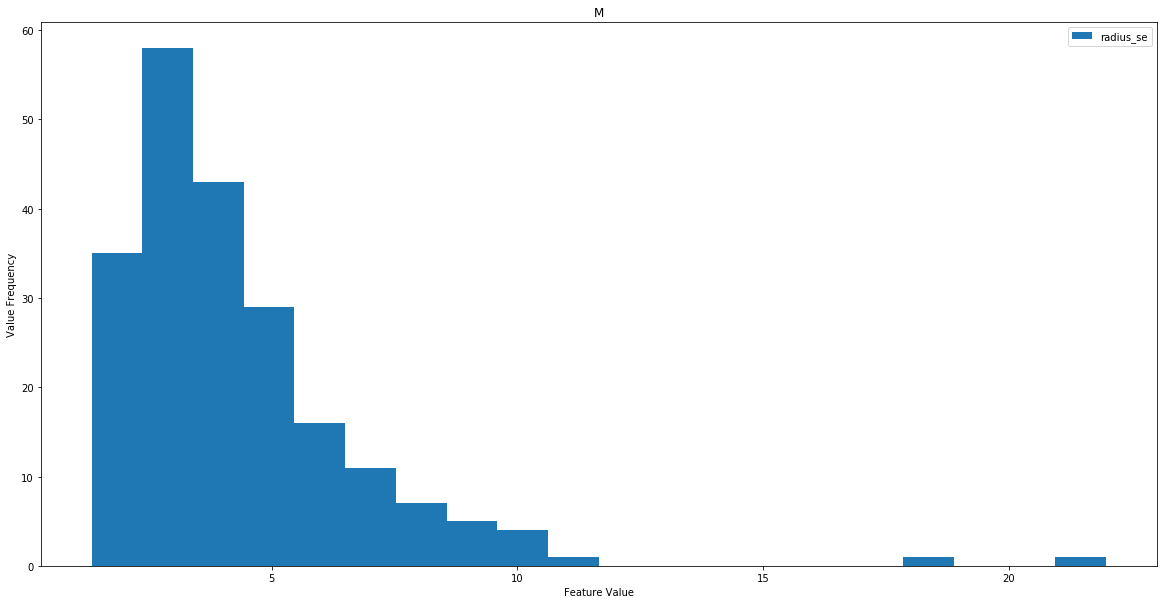

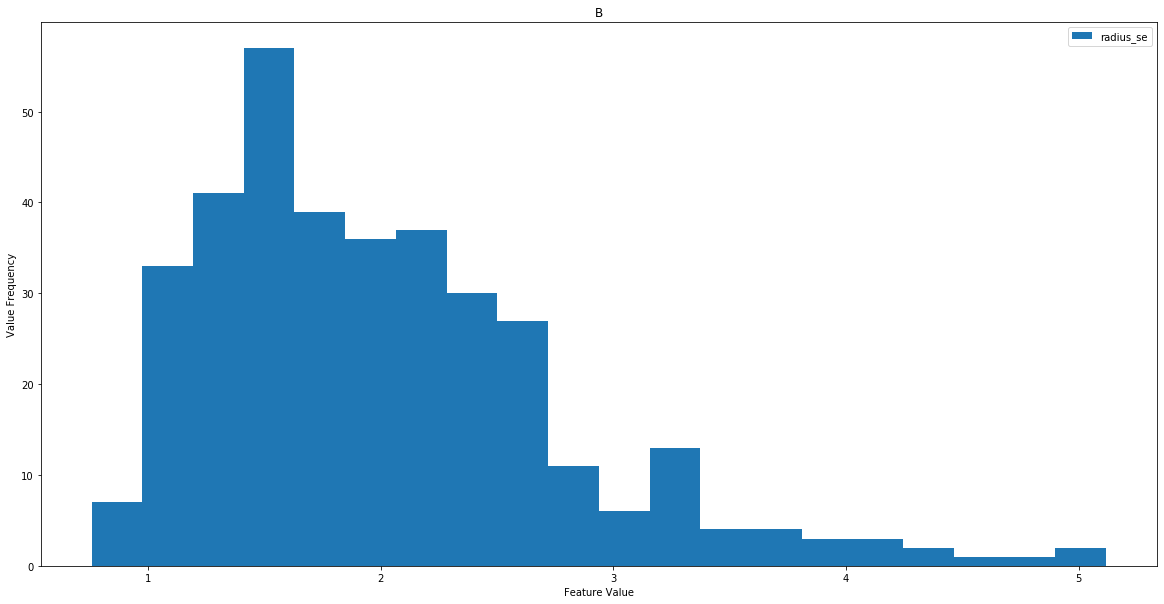

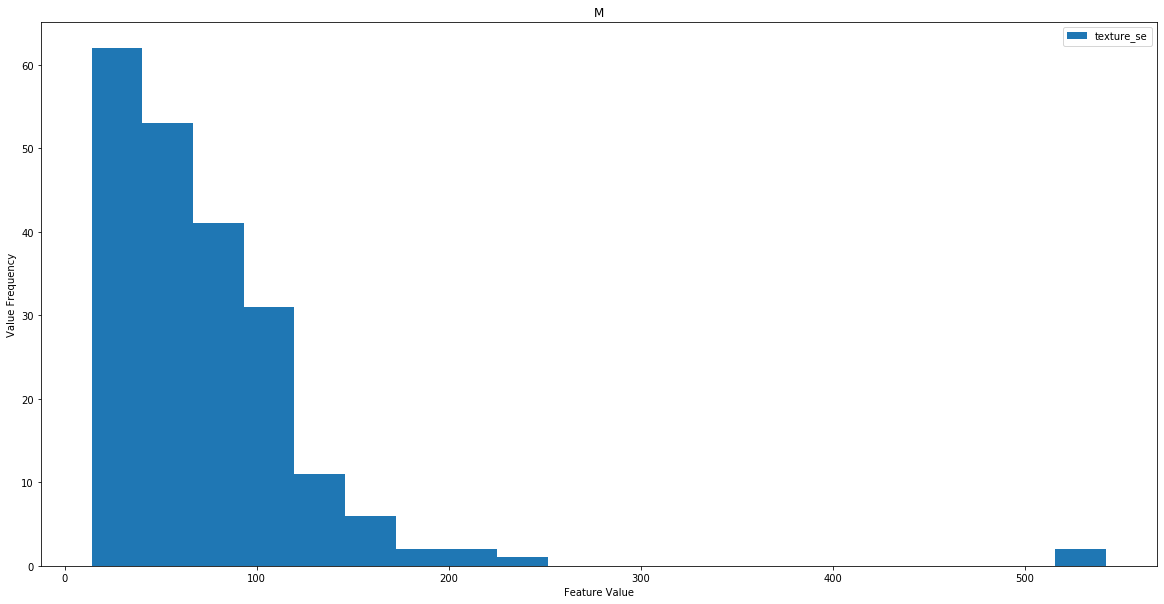

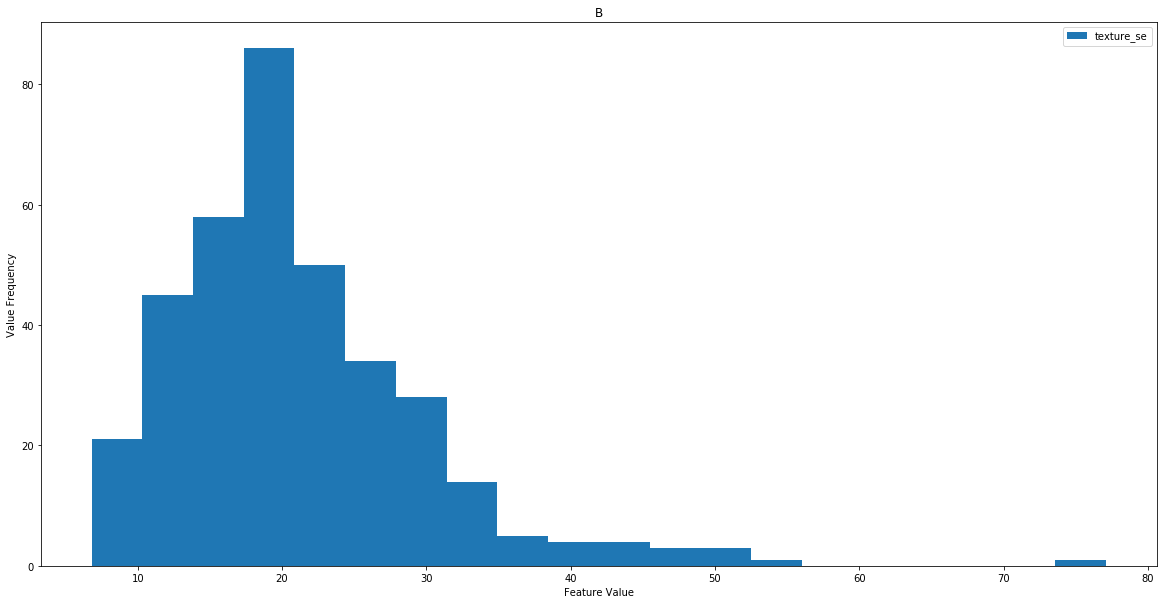

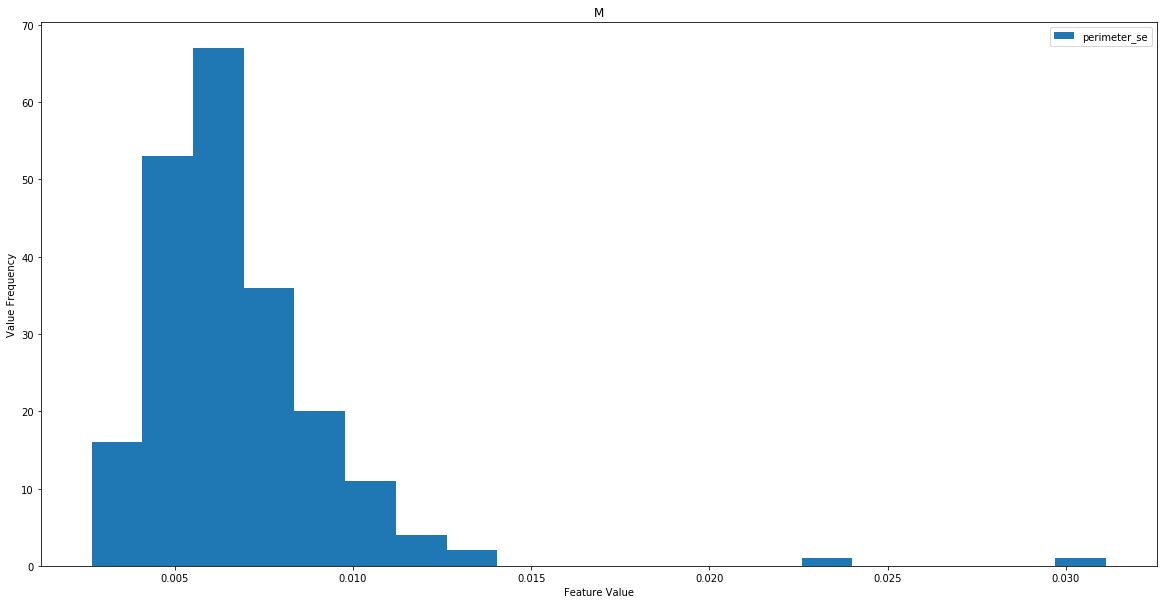

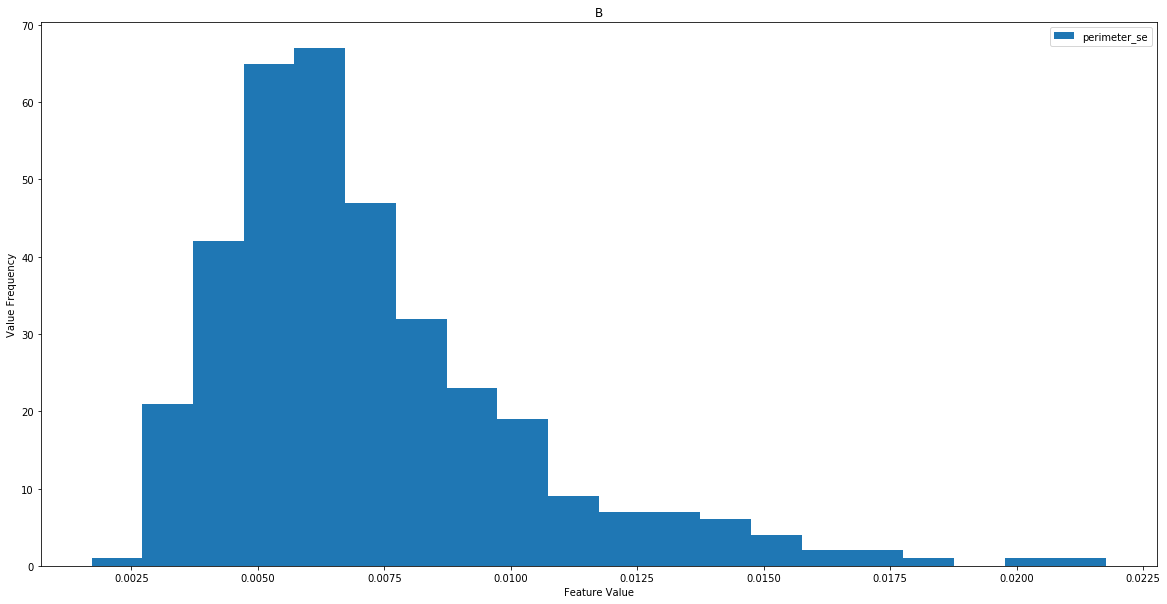

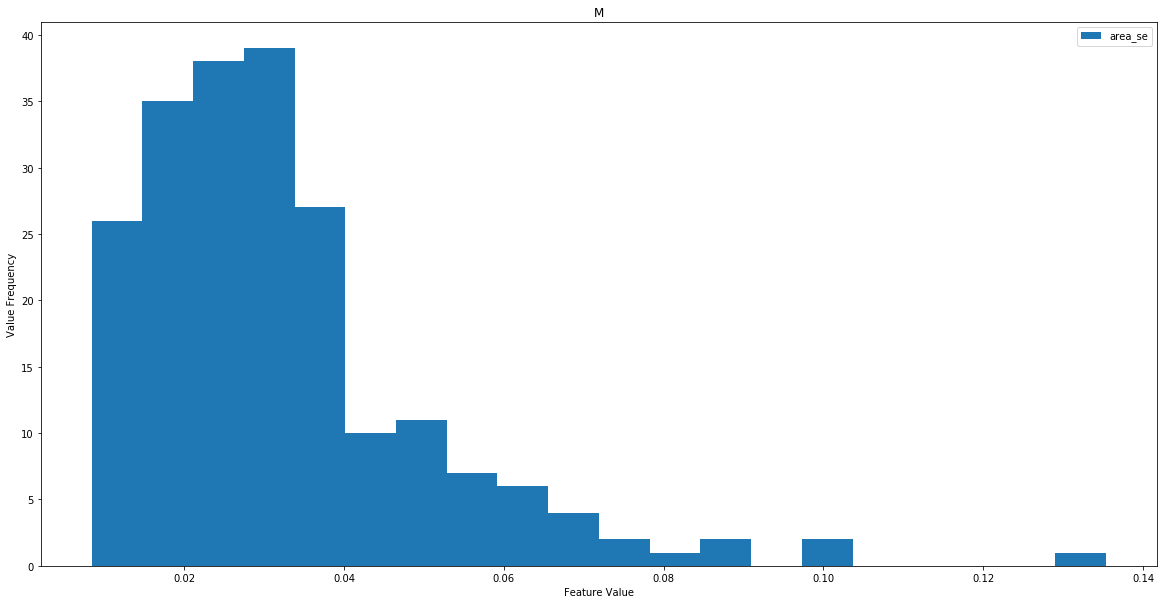

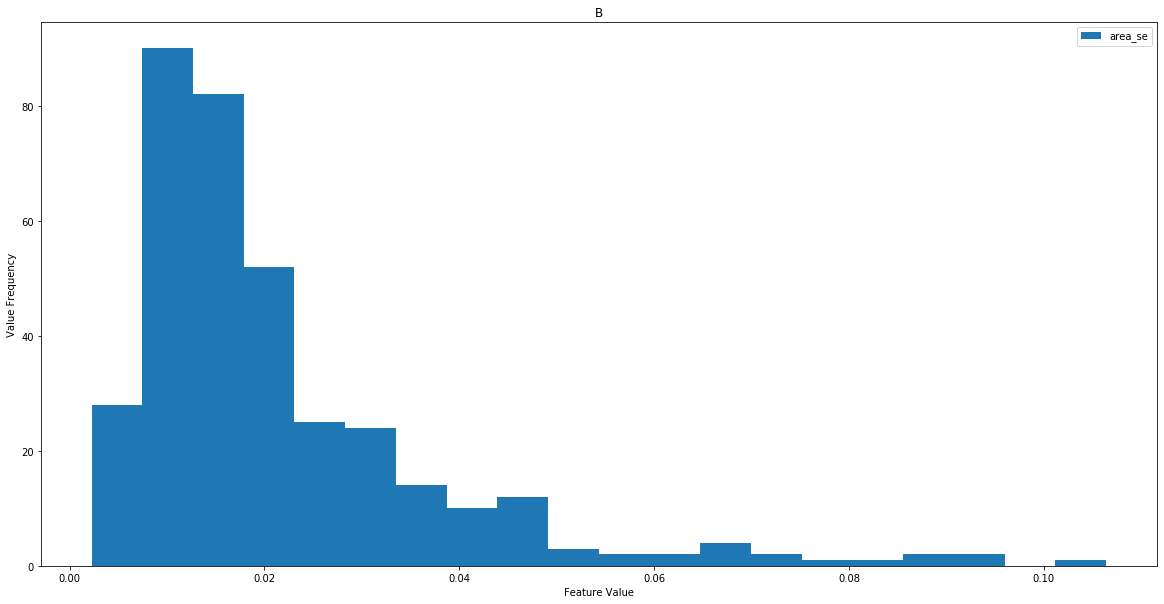

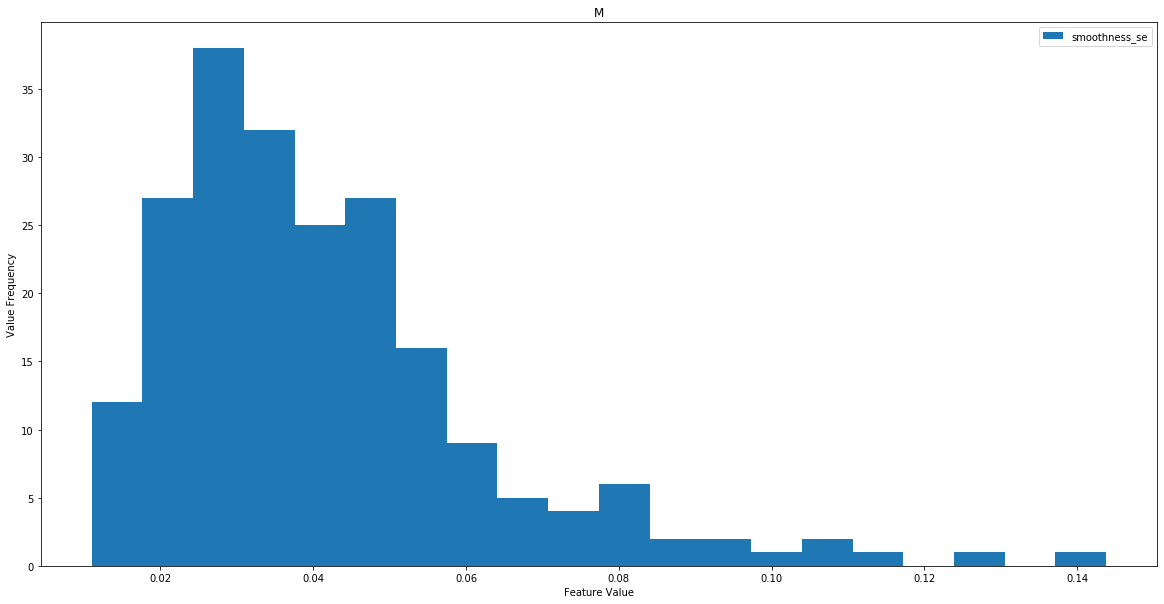

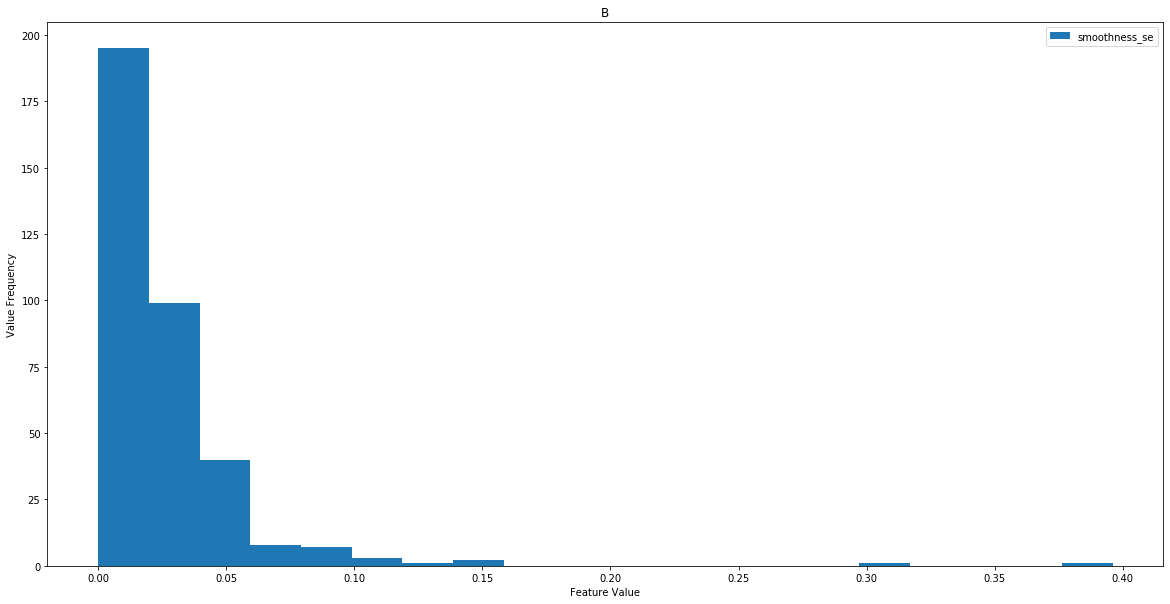

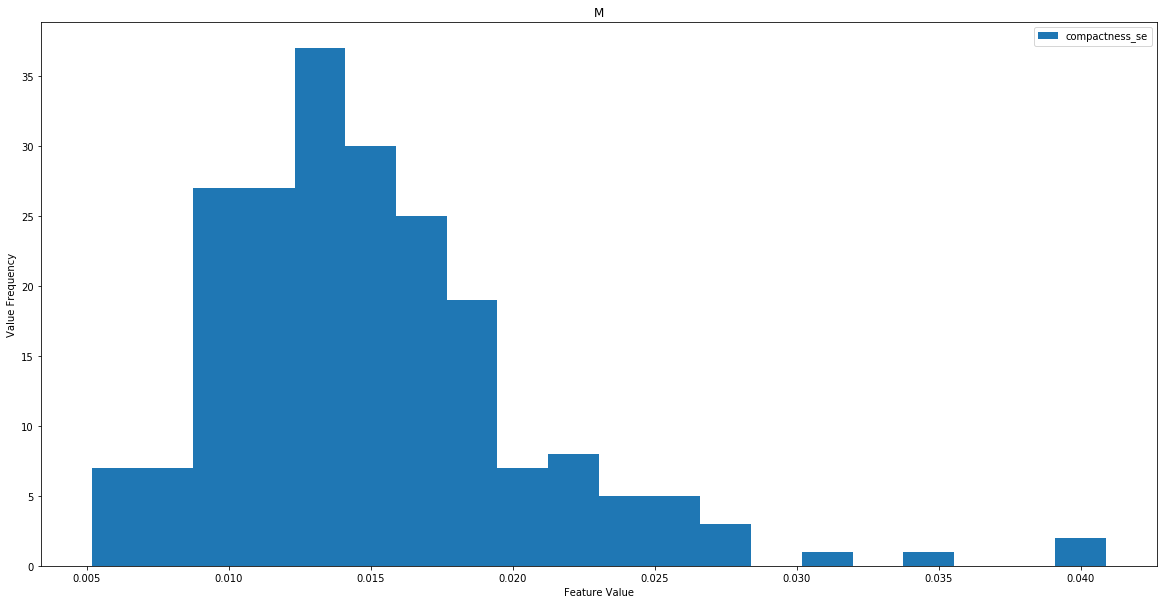

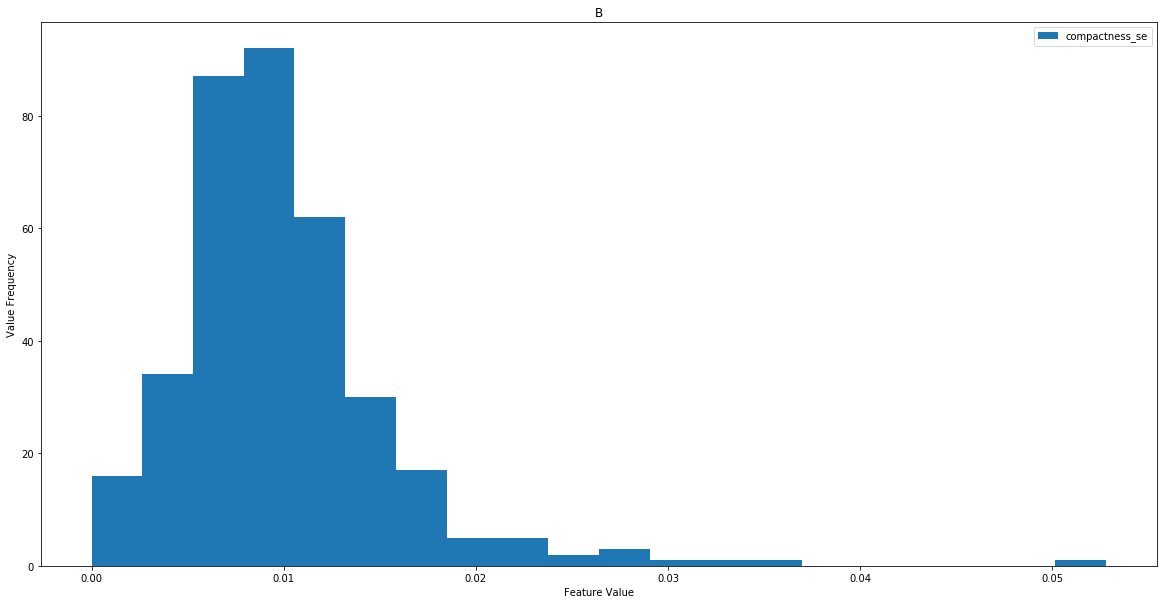

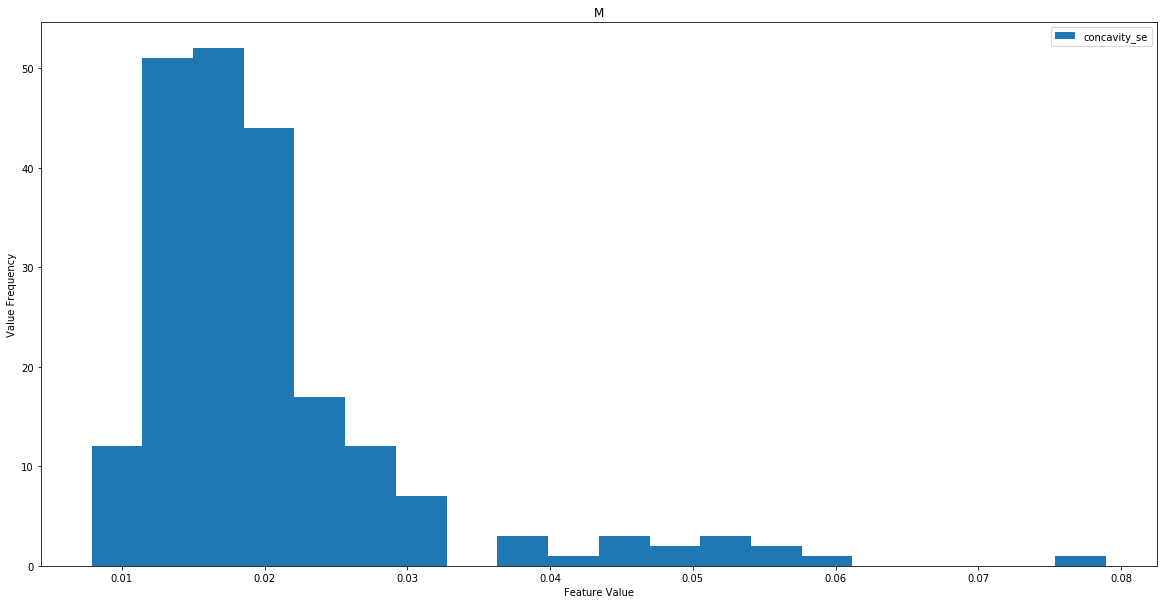

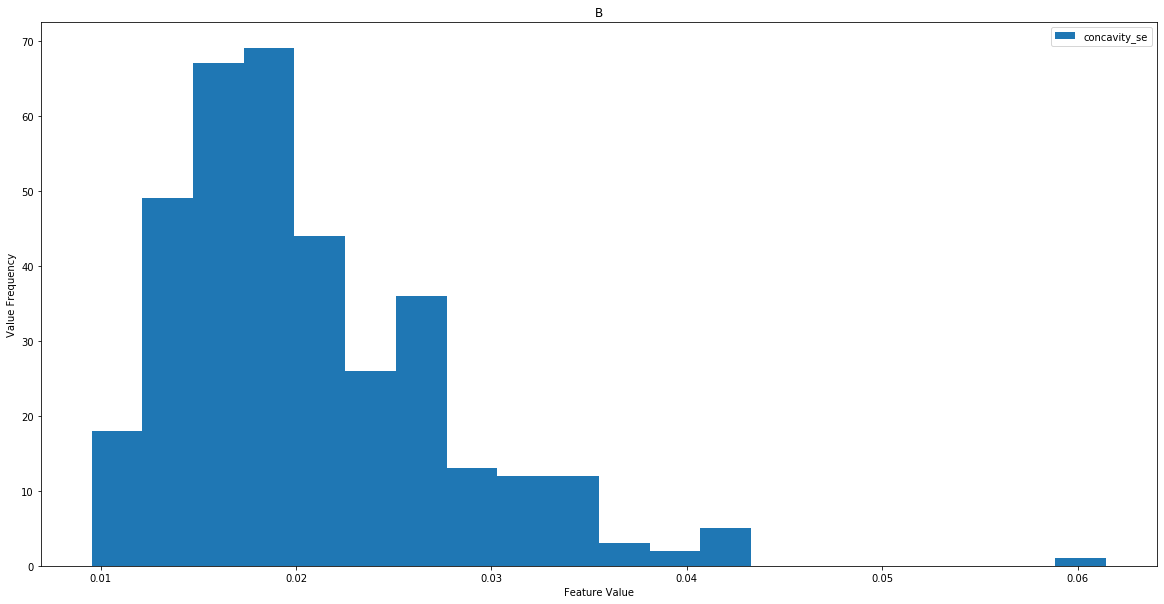

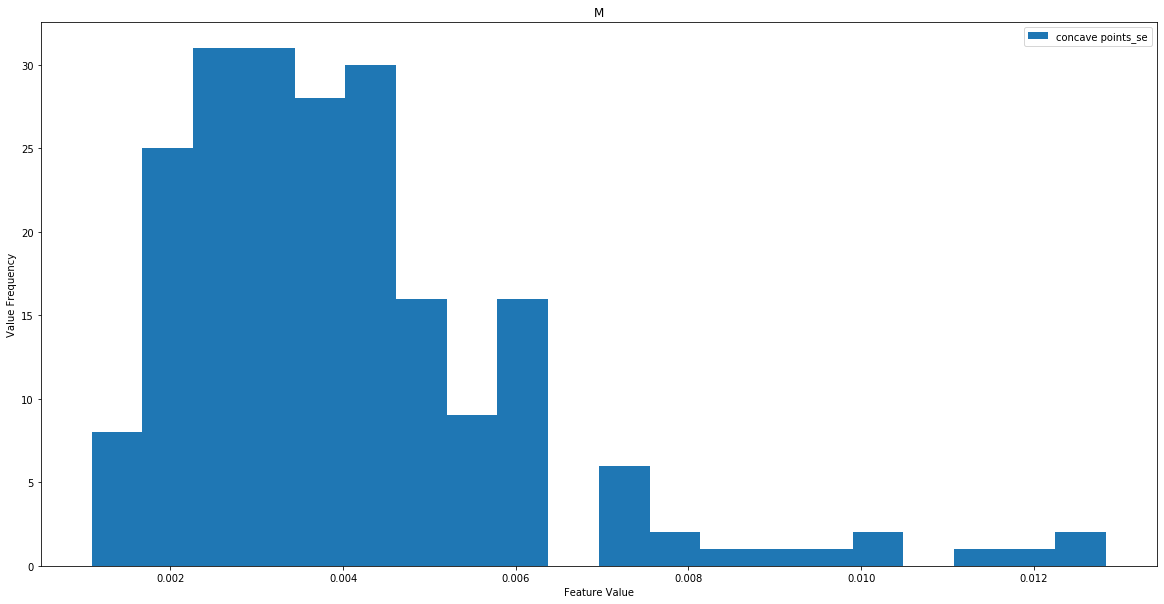

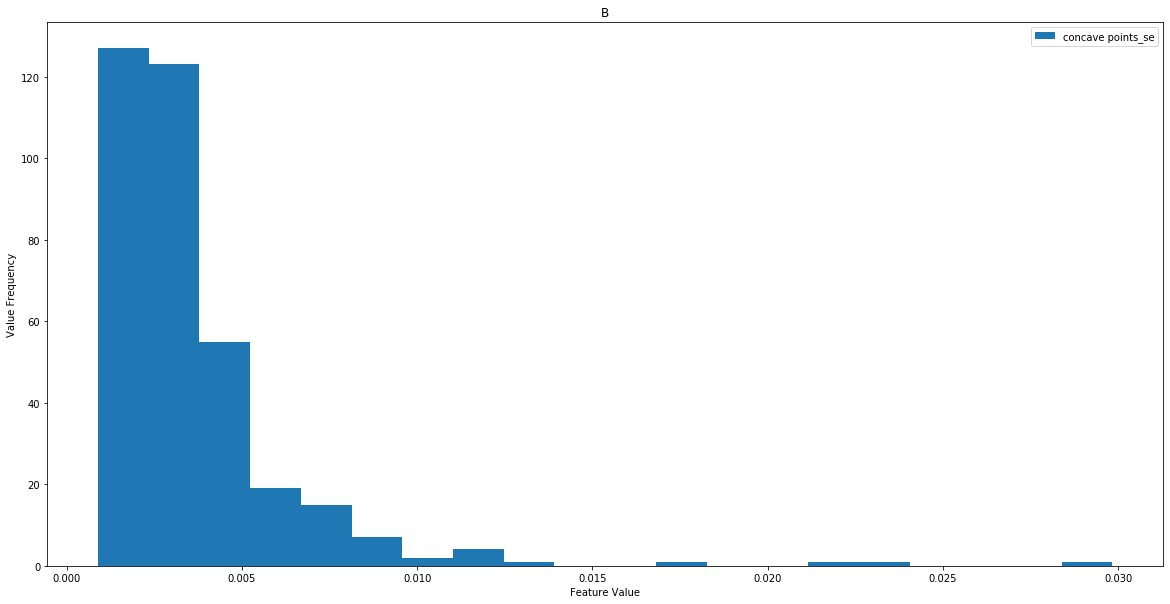

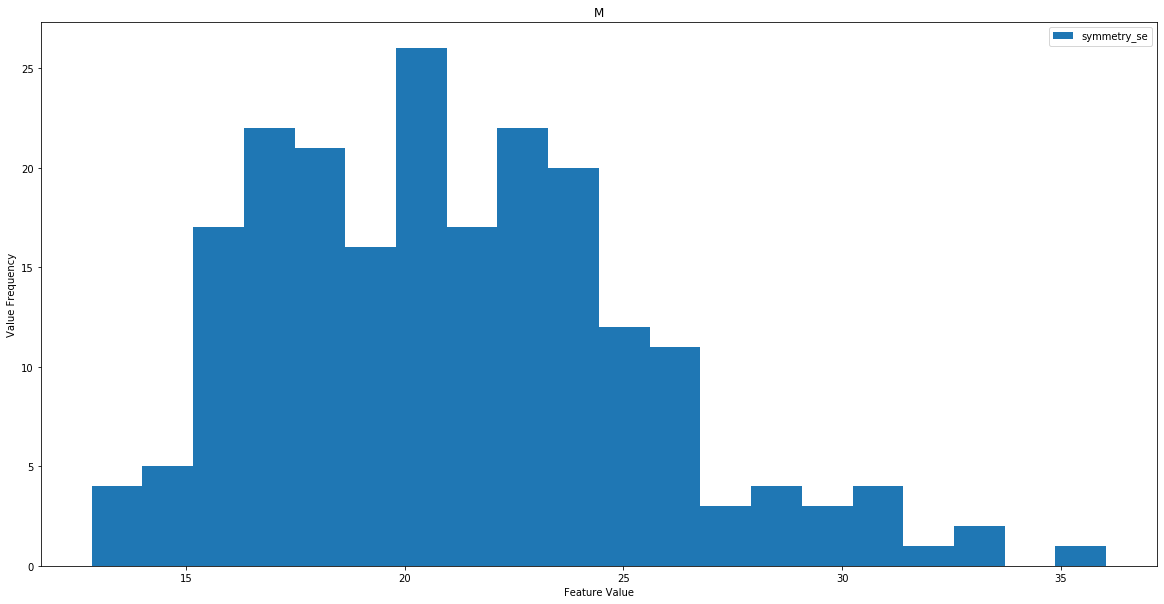

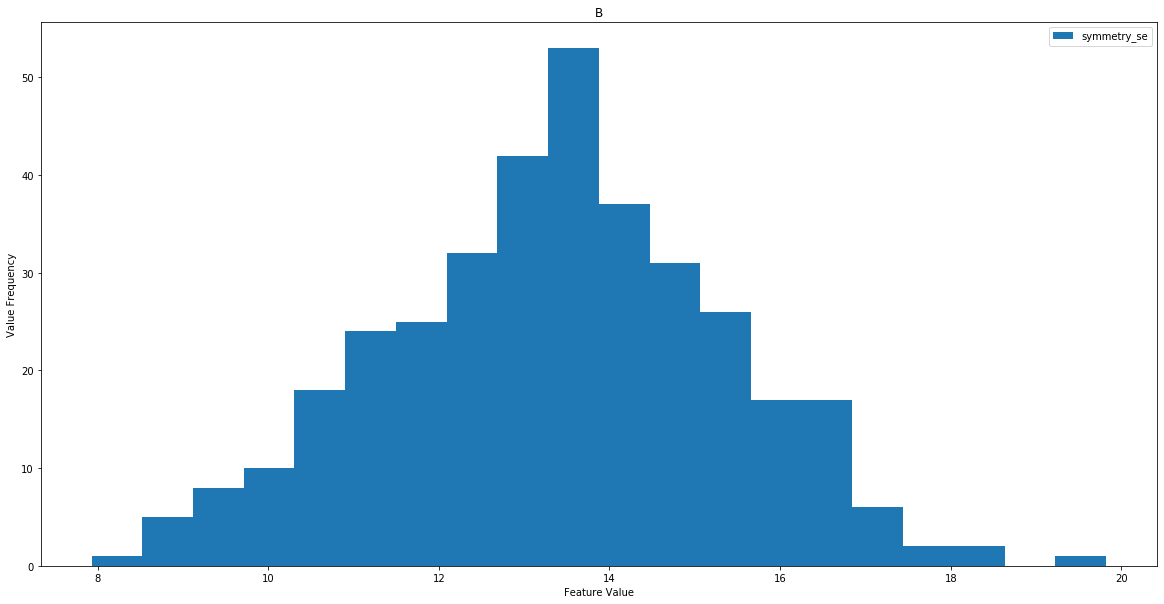

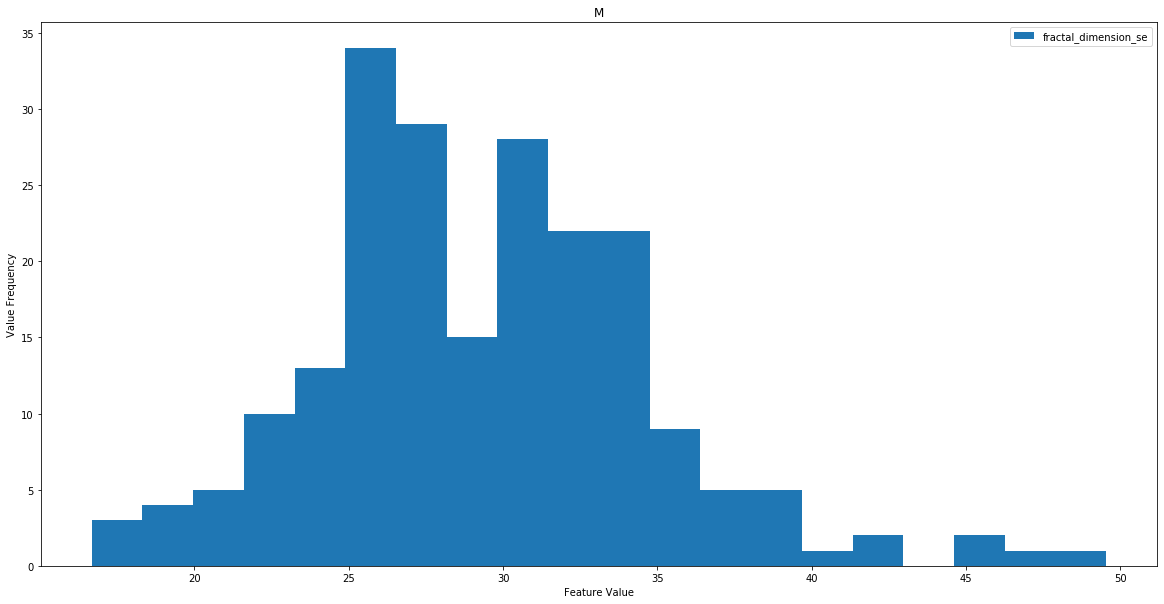

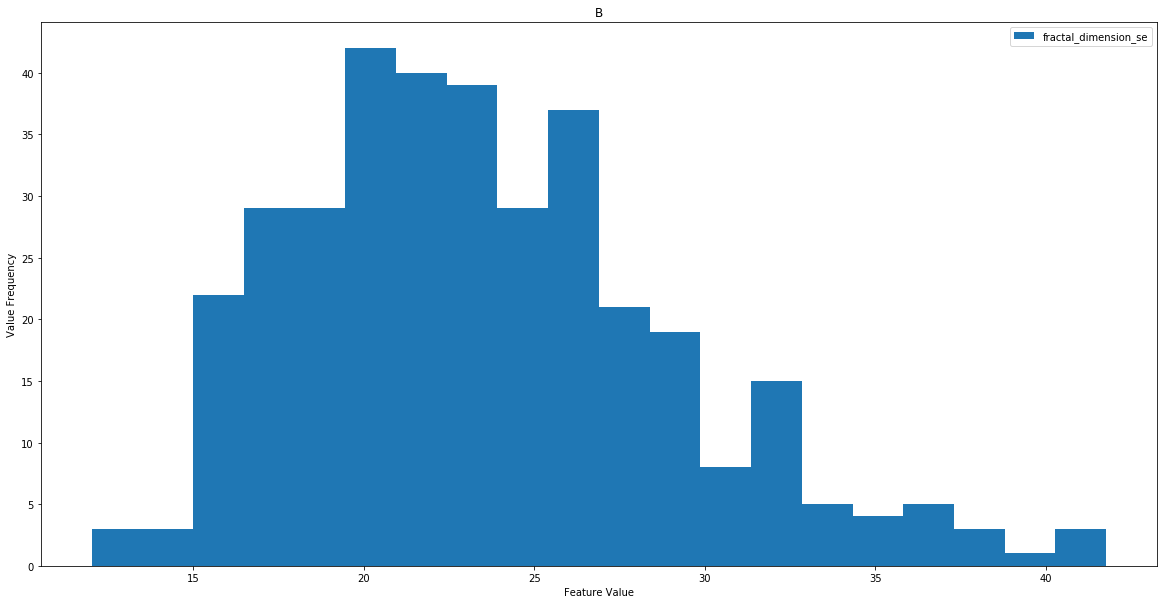

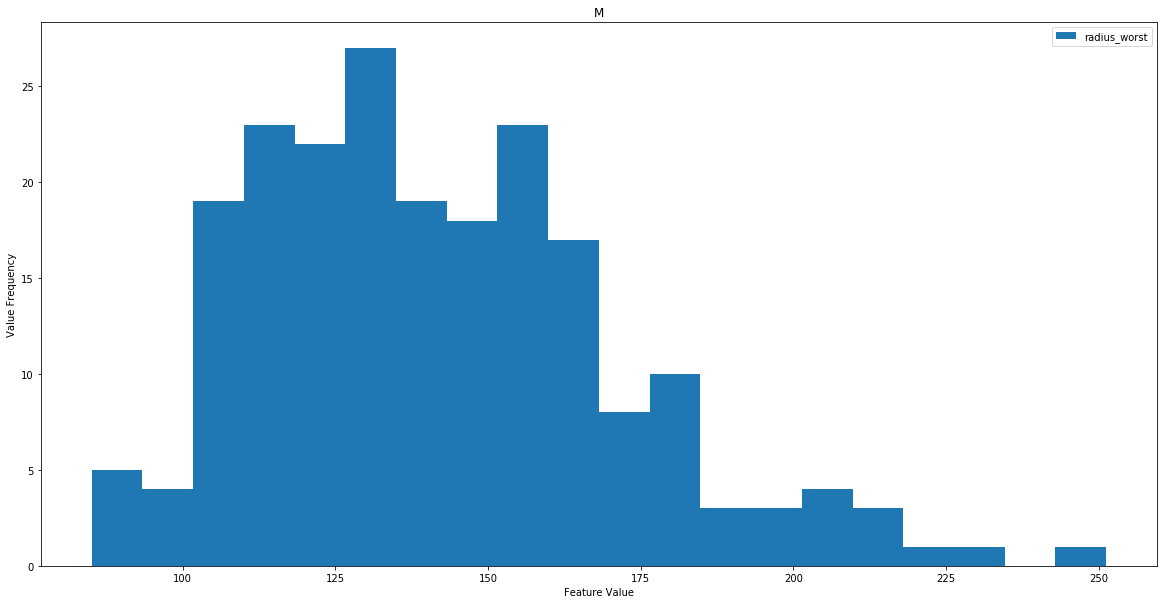

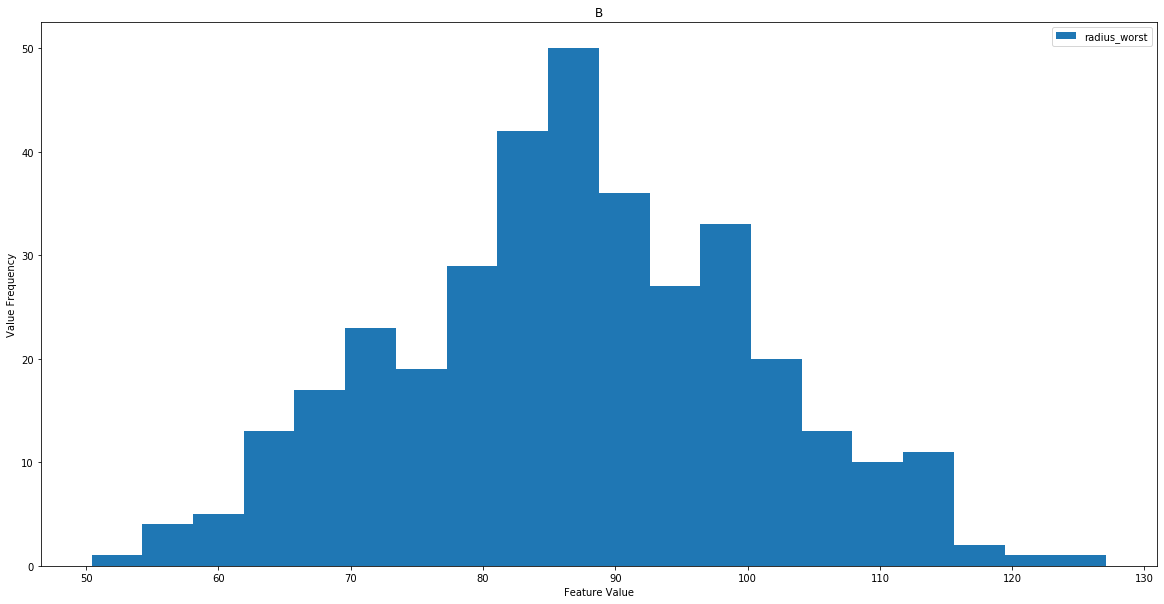

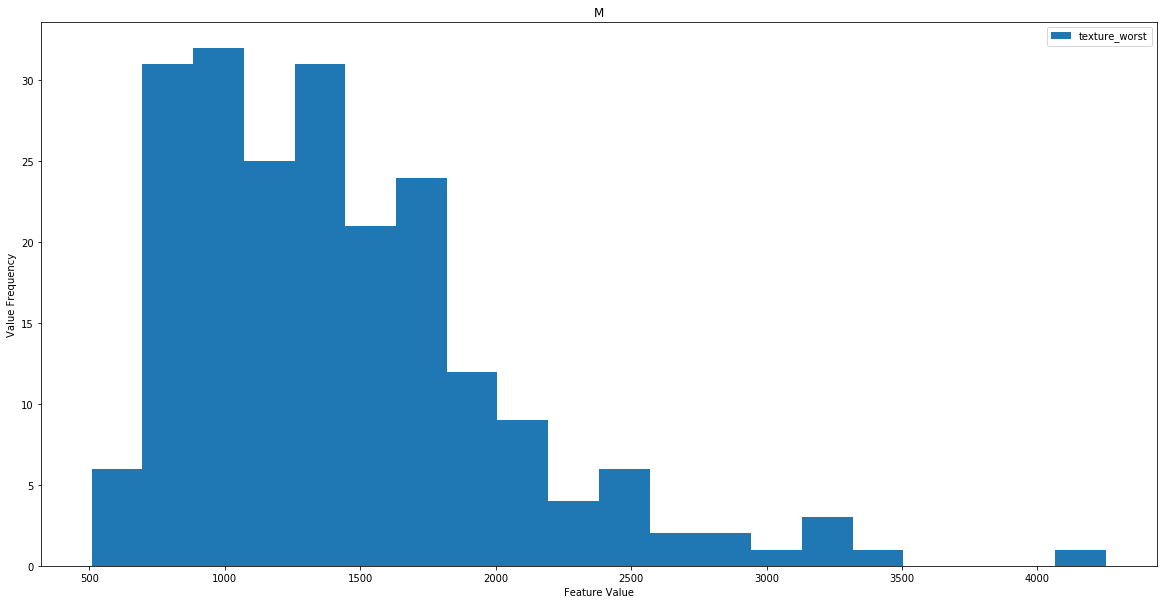

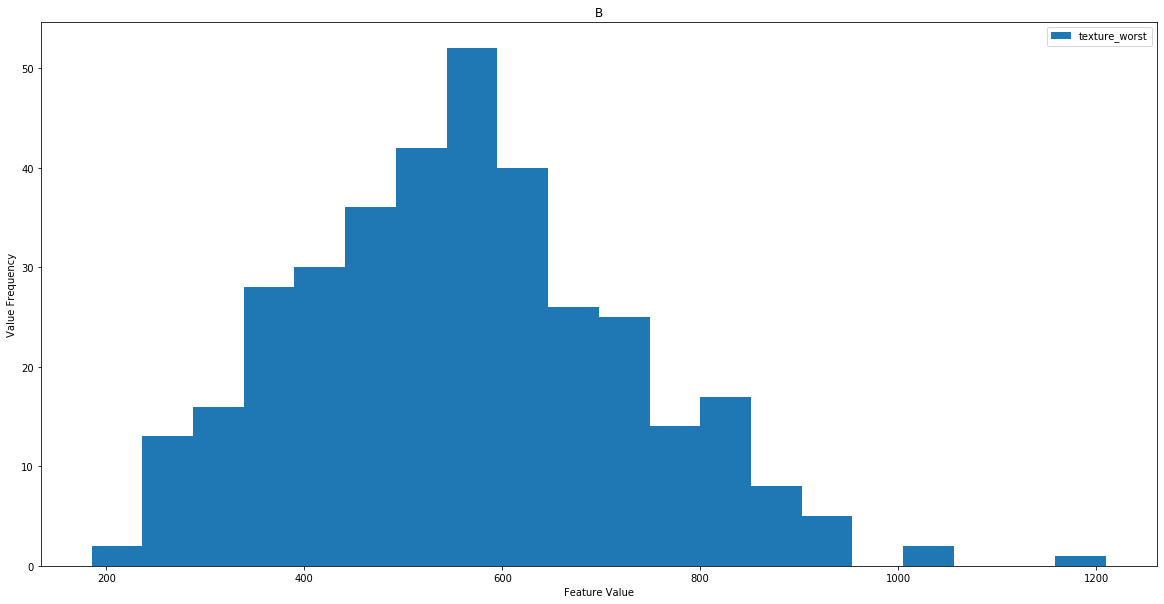

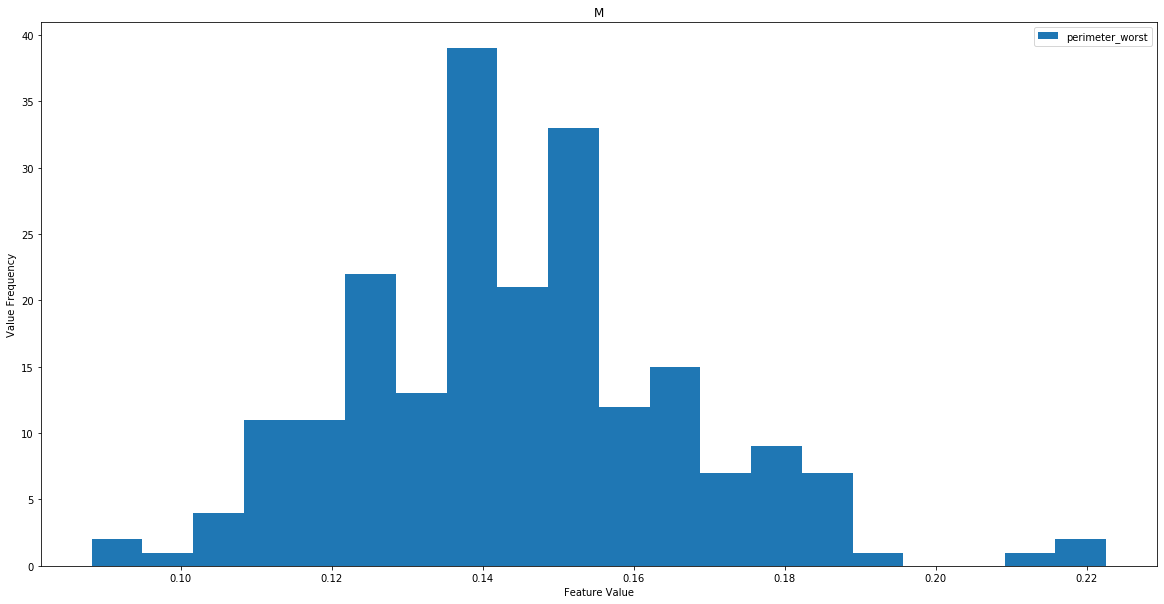

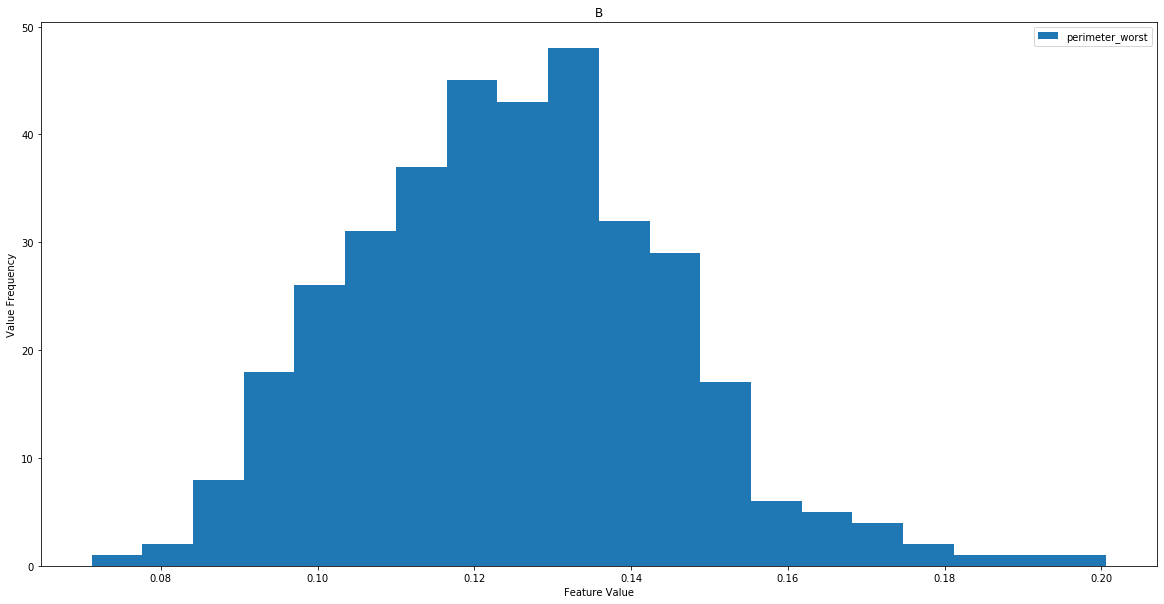

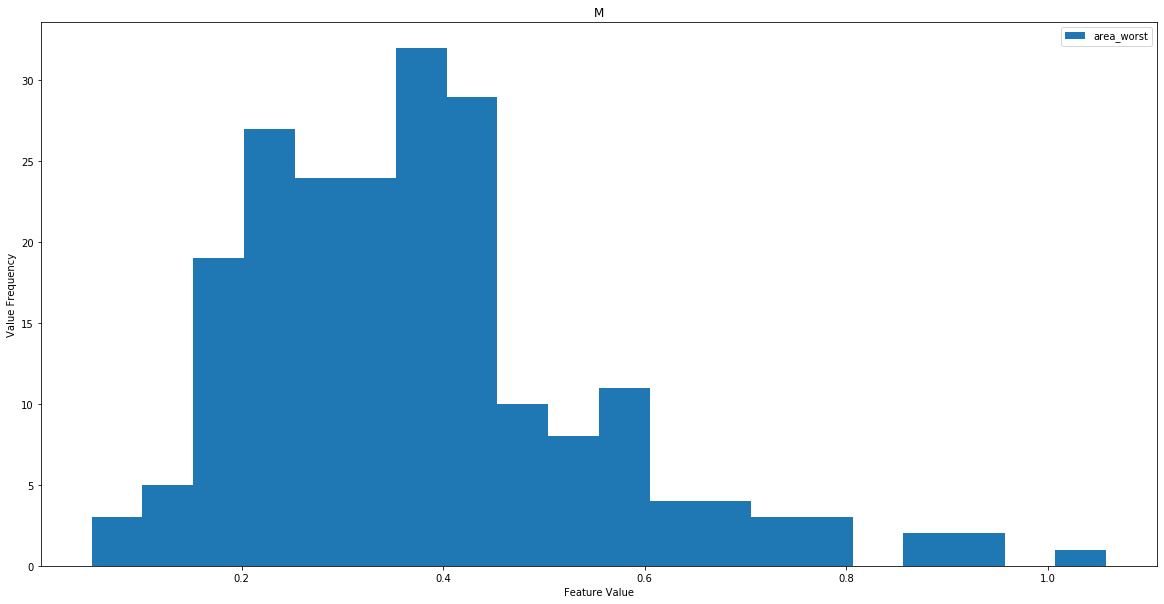

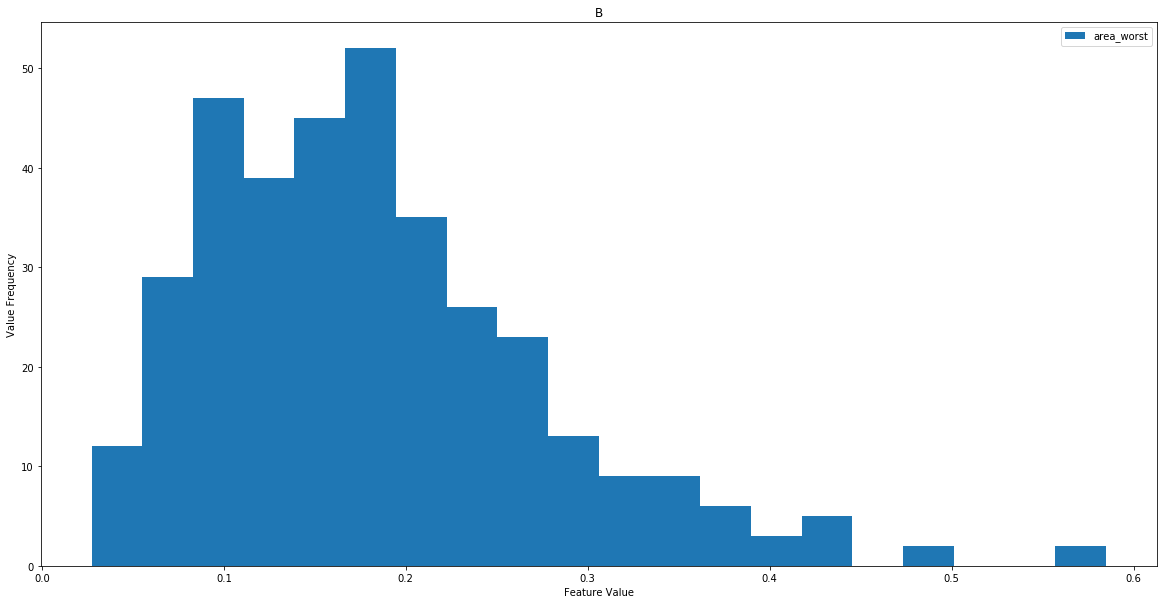

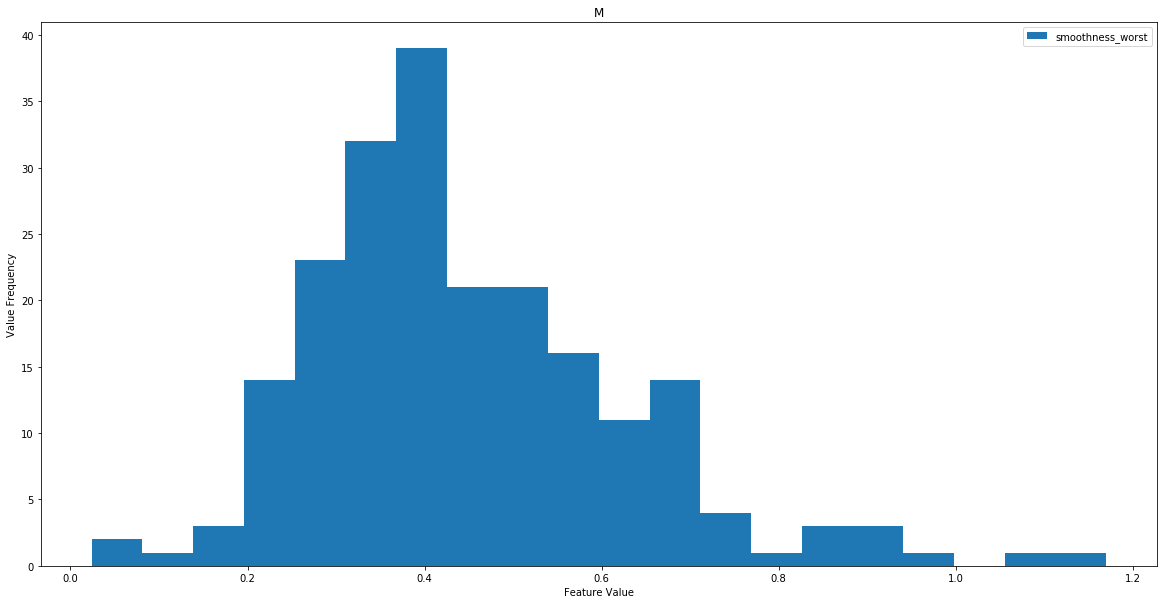

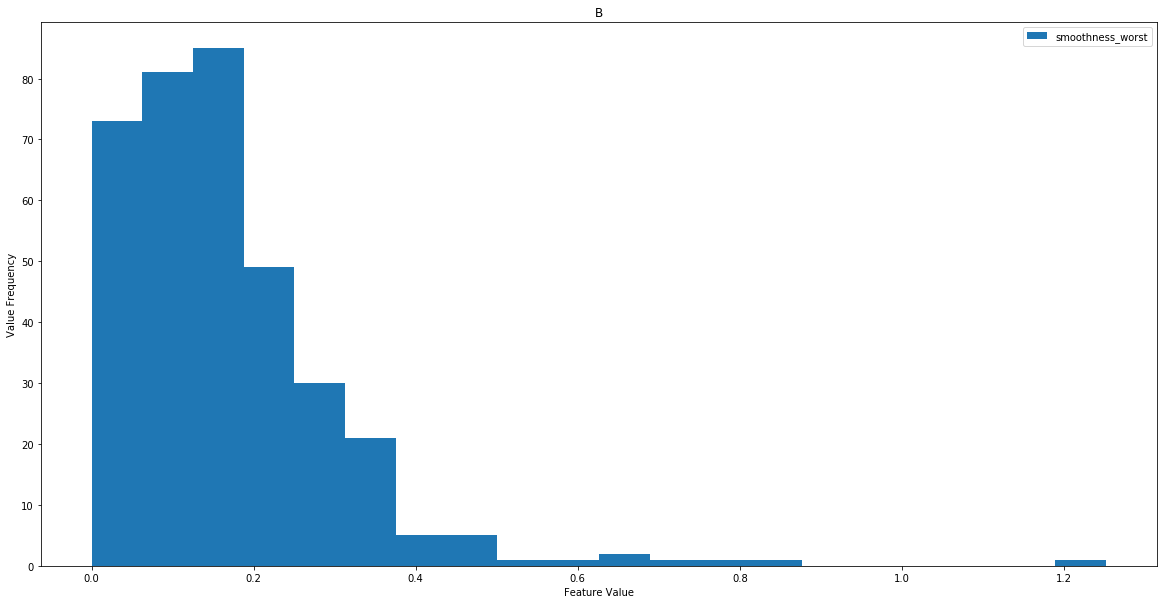

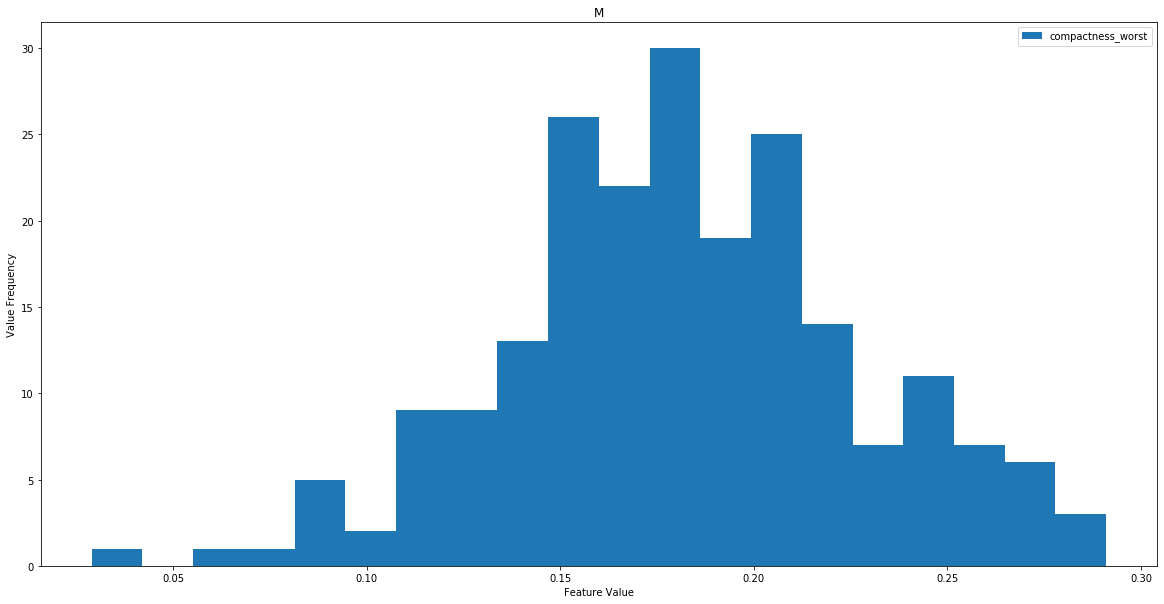

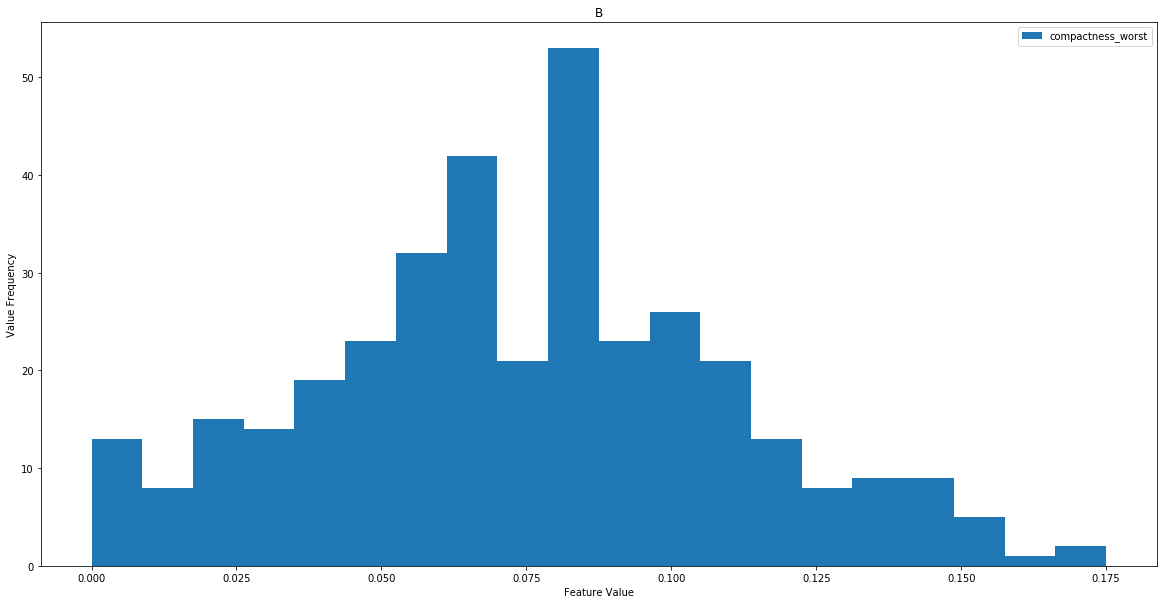

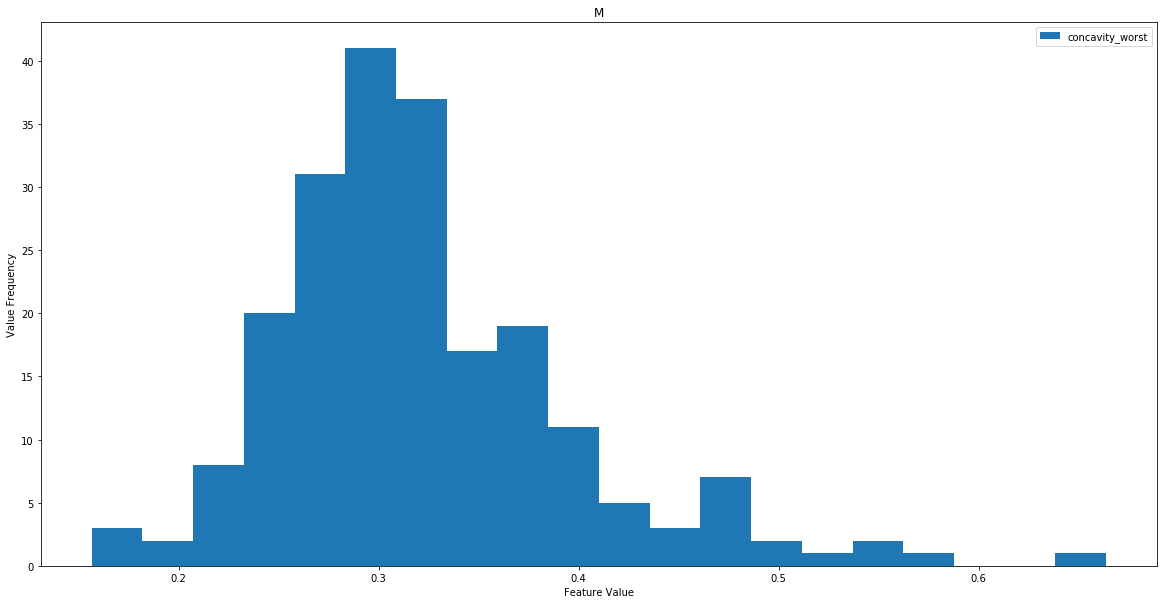

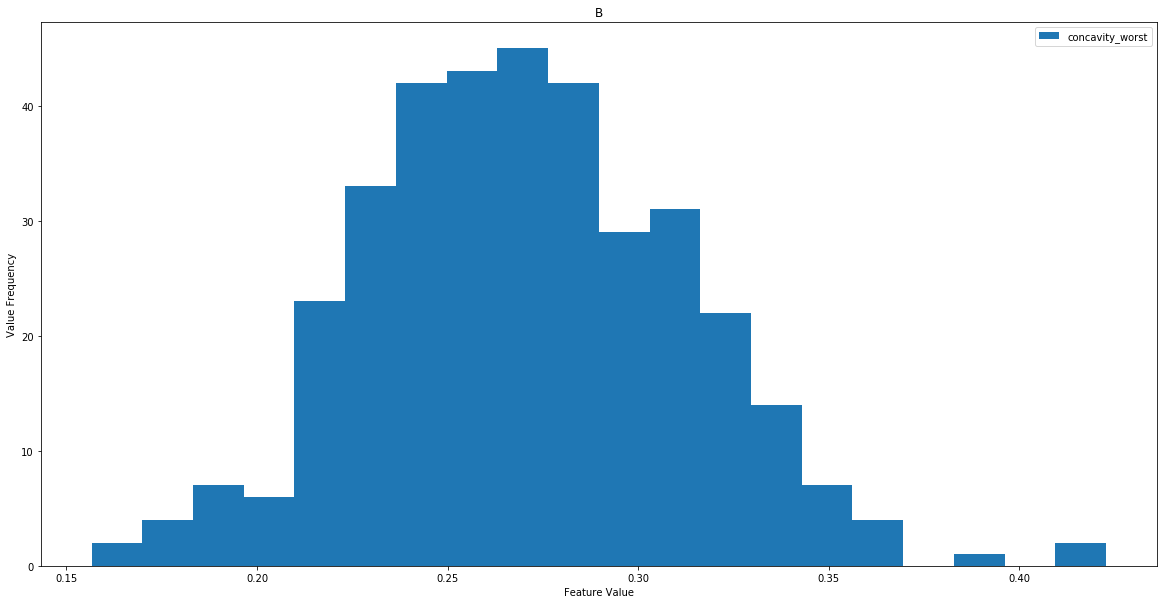

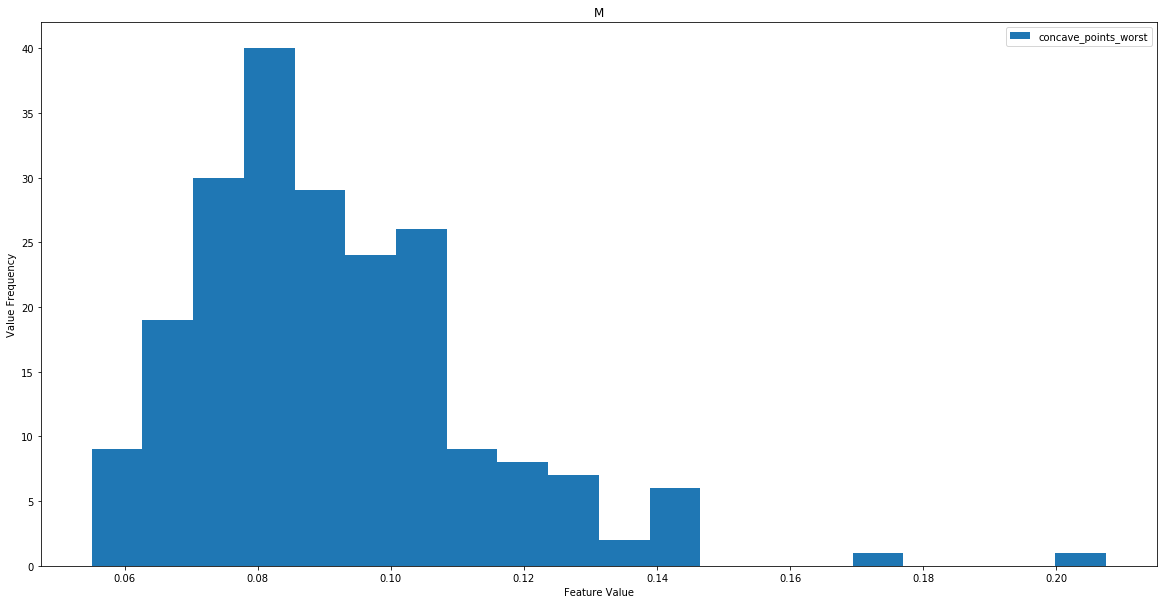

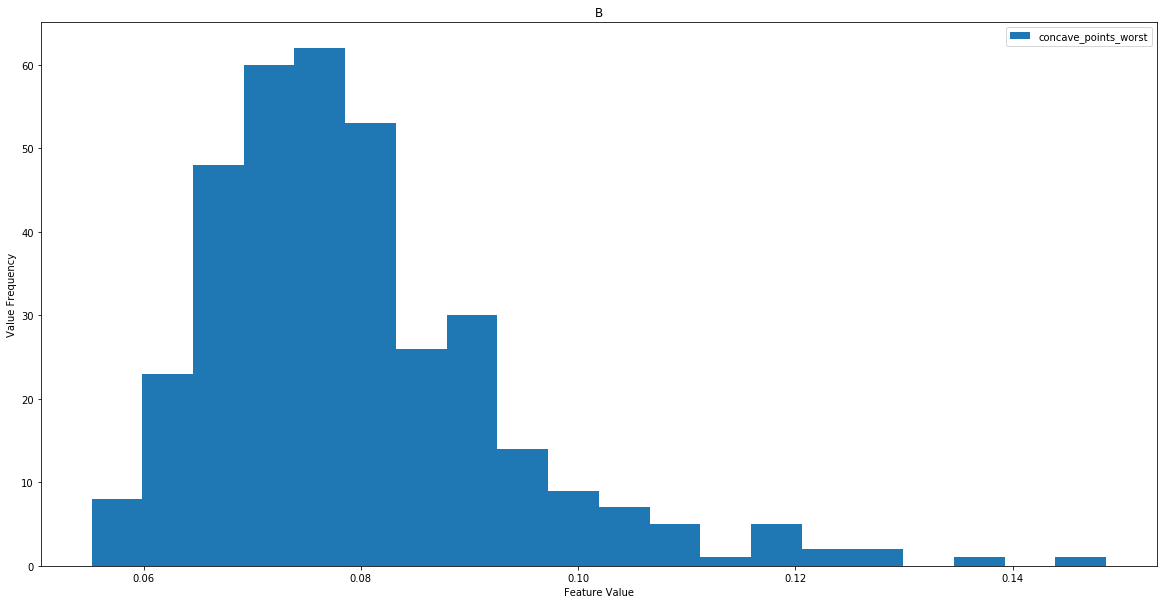

In [0]:
#plotting each attribute
for i in range(30):
  for obj in detected_class:
      obj_features = data_set[:][data_set[:,1] == obj] 
      plot_hist(obj_features[:,i+2], 20, obj,attributes[i])

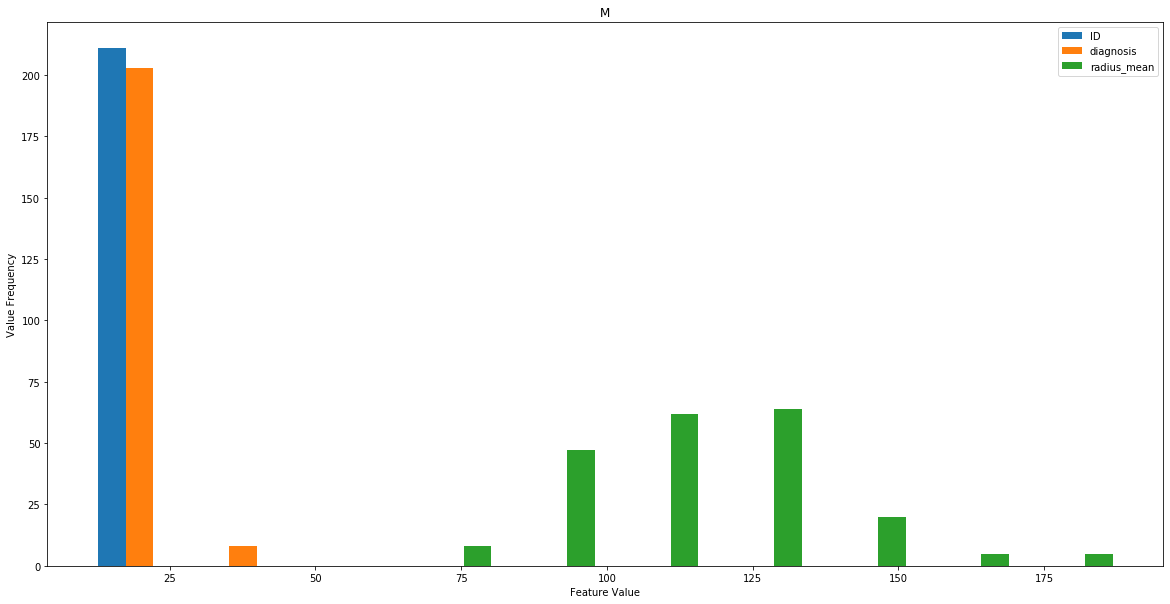

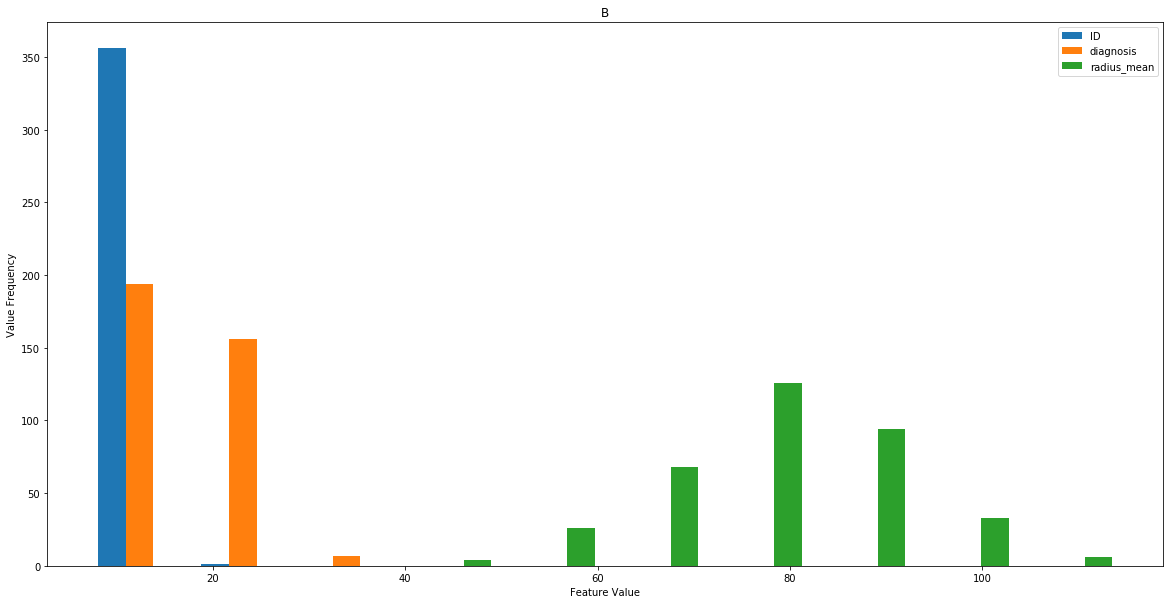

In [0]:
# plotting of A_01 to A_03
for obj in detected_class:
    obj_features = data_set[:][data_set[:,1] == obj] 
    plot_hist(obj_features[:,2:5], 10, obj,attributes[:3])

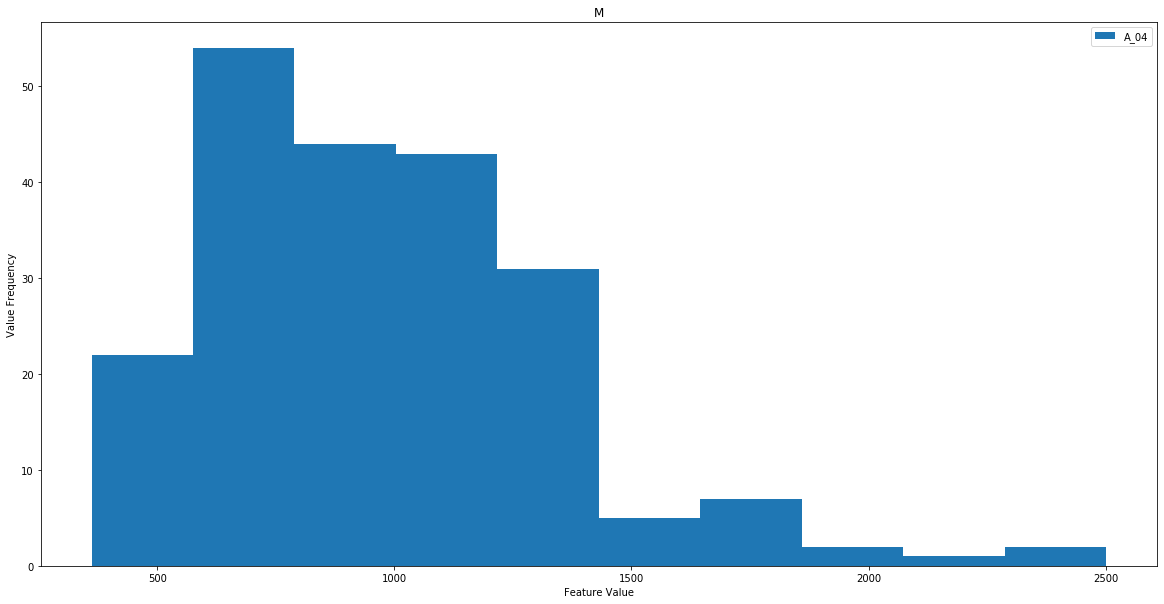

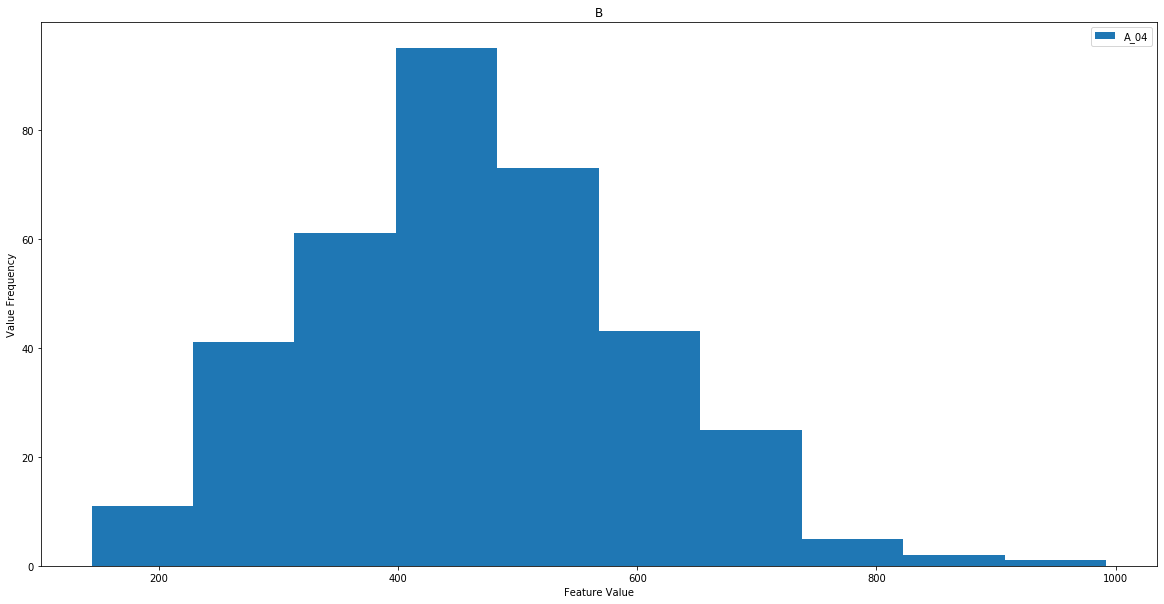

In [0]:
# plotting of A_04
for obj in detected_class:
    obj_features = data_set[:][data_set[:,1] == obj] 
    plot_hist(obj_features[:,5], 10, obj,'A_04')

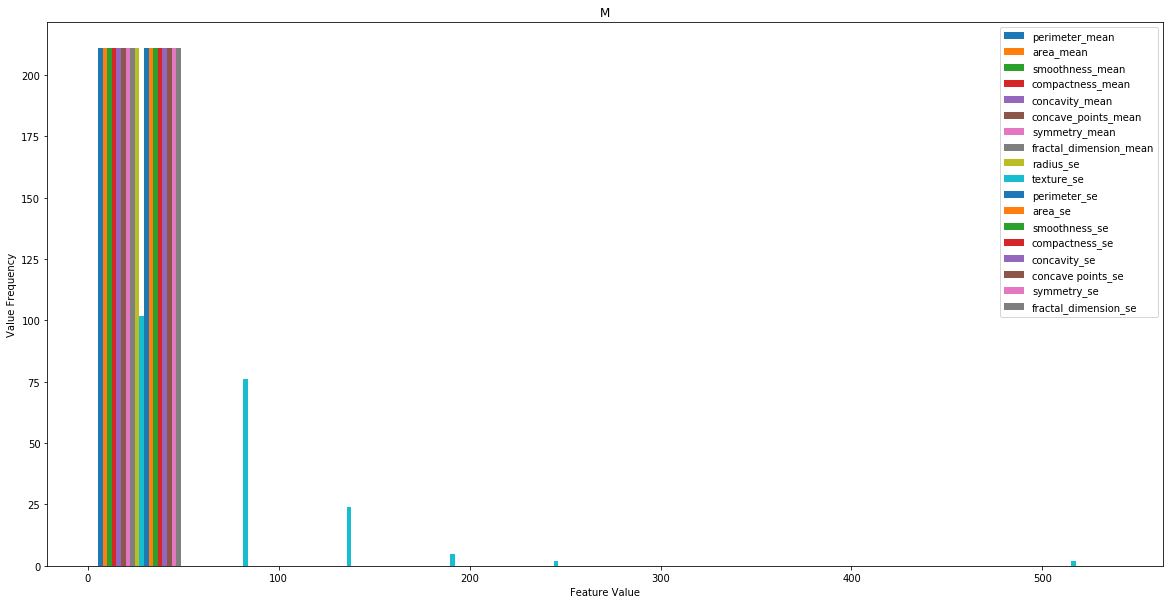

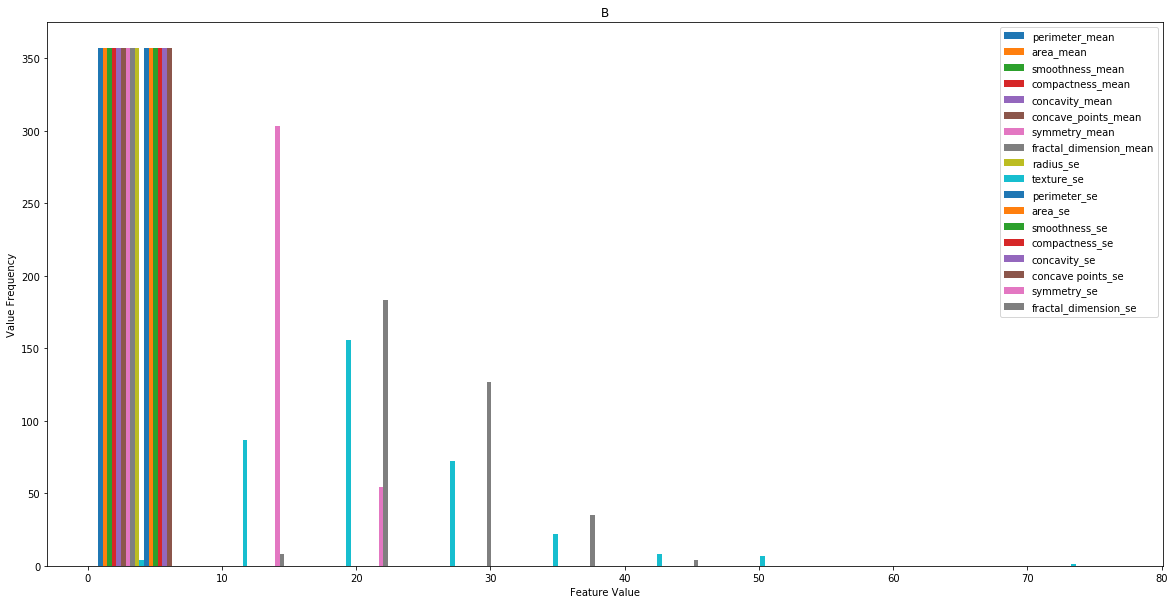

In [0]:
# plotting of A_05 to A_22
for obj in detected_class:
    obj_features = data_set[:][data_set[:,1] == obj] 
    plot_hist(obj_features[:,6:24], 10, obj,attributes[4:23])

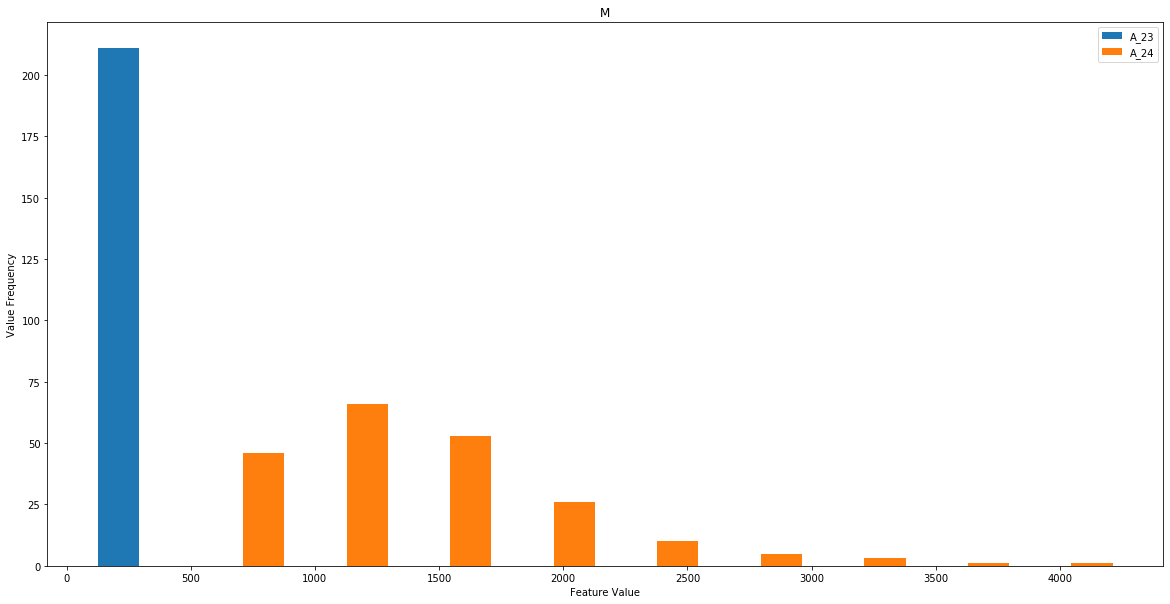

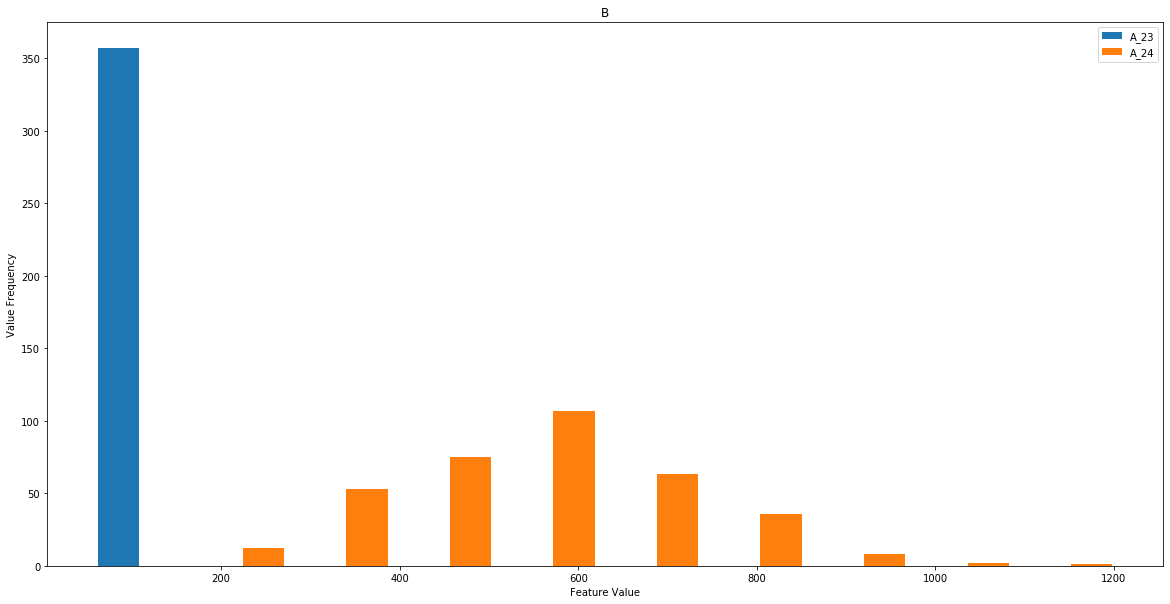

In [0]:
# plotting of A_23 and A_24
for obj in detected_class:
    obj_features = data_set[:][data_set[:,1] == obj] 
    plot_hist(obj_features[:,24:26], 10, obj,['A_23','A_24'])

### **Data exploration conclusion:**
  


*   all attributes are numerical (ratio_scaled)
*   range af attributes is almost nearby to each other except for two or three attributes
*   Almost all attributes are normally distributed so applying z_score normalization would be usefull
*   attributes seem to have no correlation so applying dimetionality reduction wouldn't help



##**Classification before preprocessing**

### Disision tree calssifier

Basic Decision tree classifier constructs a tree with depth =  8
accuracy =  0.9415204678362573
correctly classified instances =  161 out of 171
labels =  ['M' 'B'] 
 percision =  [0.90909091 0.96190476] 
 recall =  [0.9375     0.94392523] 
 f1_score =  [0.92307692 0.95283019] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[101   6]
 [  4  60]]


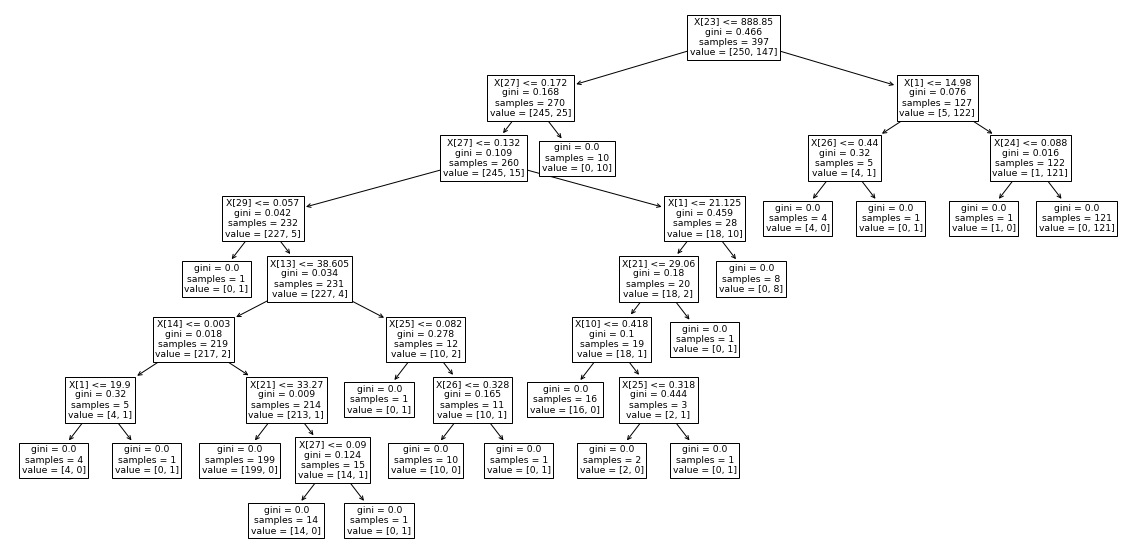

In [0]:
#simple implementation for Decision tree without hyperparameter tunnig
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(random_state=0)
# fitting training data

dt_f = dt_clf.fit(train[:,2:],train[:,1])

fig = plt.figure(figsize=(20,10))
tree.plot_tree(dt_f)

#depth of the tree
dt_depth = dt_clf.get_depth()
print('Basic Decision tree classifier constructs a tree with depth = ', dt_depth)

#evaluating desicion tree
eval_metrics(test[:,1],dt_clf.predict(test[:,2:]))



### AdaBoost Classifier

In [0]:
# AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(random_state=0)

# fitting training data
adb_f = adb_clf.fit(train[:,2:],train[:,1])


#evaluating AdaBoost
eval_metrics(test[:,1],adb_clf.predict(test[:,2:]))


accuracy =  0.9532163742690059
correctly classified instances =  163 out of 171
labels =  ['M' 'B'] 
 percision =  [0.96666667 0.94594595] 
 recall =  [0.90625    0.98130841] 
 f1_score =  [0.93548387 0.96330275] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[105   2]
 [  6  58]]


### Random Forest Classifier

In [0]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

# fitting training data
rf_f = rf_clf.fit(train[:,2:],train[:,1])

#depth of the tree
#rf_depth = rf_clf.max_depth()
#print('depth = ', rf_depth)

#evaluating RandomForestClassifier
eval_metrics(test[:,1],rf_clf.predict(test[:,2:]))

accuracy =  0.9649122807017544
correctly classified instances =  165 out of 171
labels =  ['M' 'B'] 
 percision =  [0.98333333 0.95495495] 
 recall =  [0.921875   0.99065421] 
 f1_score =  [0.9516129  0.97247706] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[106   1]
 [  5  59]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## **Data** **Preprosessing**

### **Feature scalling using z_score normailzation**
We have seen from the histograms that the data is distributed to nearly normal for some features. So we will try to normalize all the featues to be more useful later in the classification algorithms

In [0]:
# scale data
z_score_scaler = preprocessing.StandardScaler(copy=True, with_std=True, with_mean=True)

# fit and transform
#normalizing train data
normTrain = z_score_scaler.fit_transform(train[:, 2:])
#normalizing test data
normTest = z_score_scaler.fit_transform(test[:,2:])

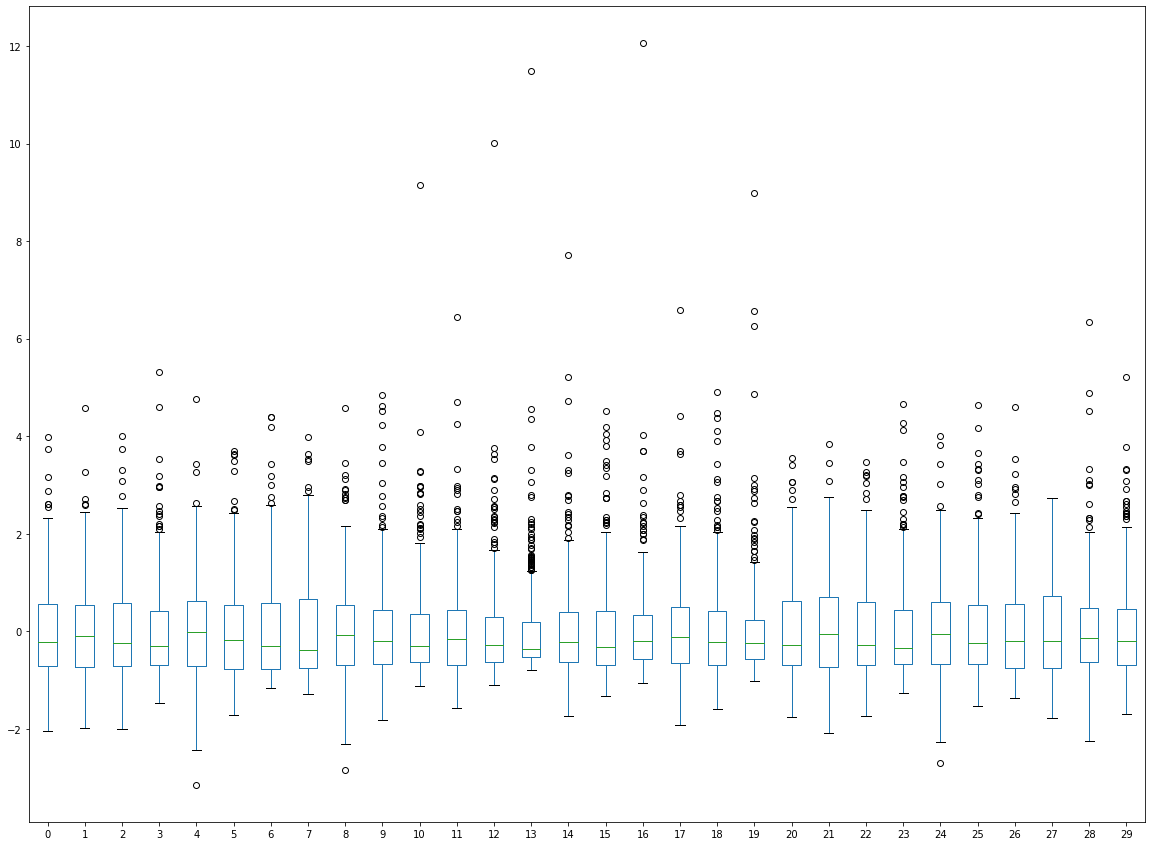

In [0]:
#Visualizing train data after normalization by Z Score
fig = plt.figure(figsize = (20,15))
box = pd.DataFrame(normTrain)
box.boxplot(grid=False)

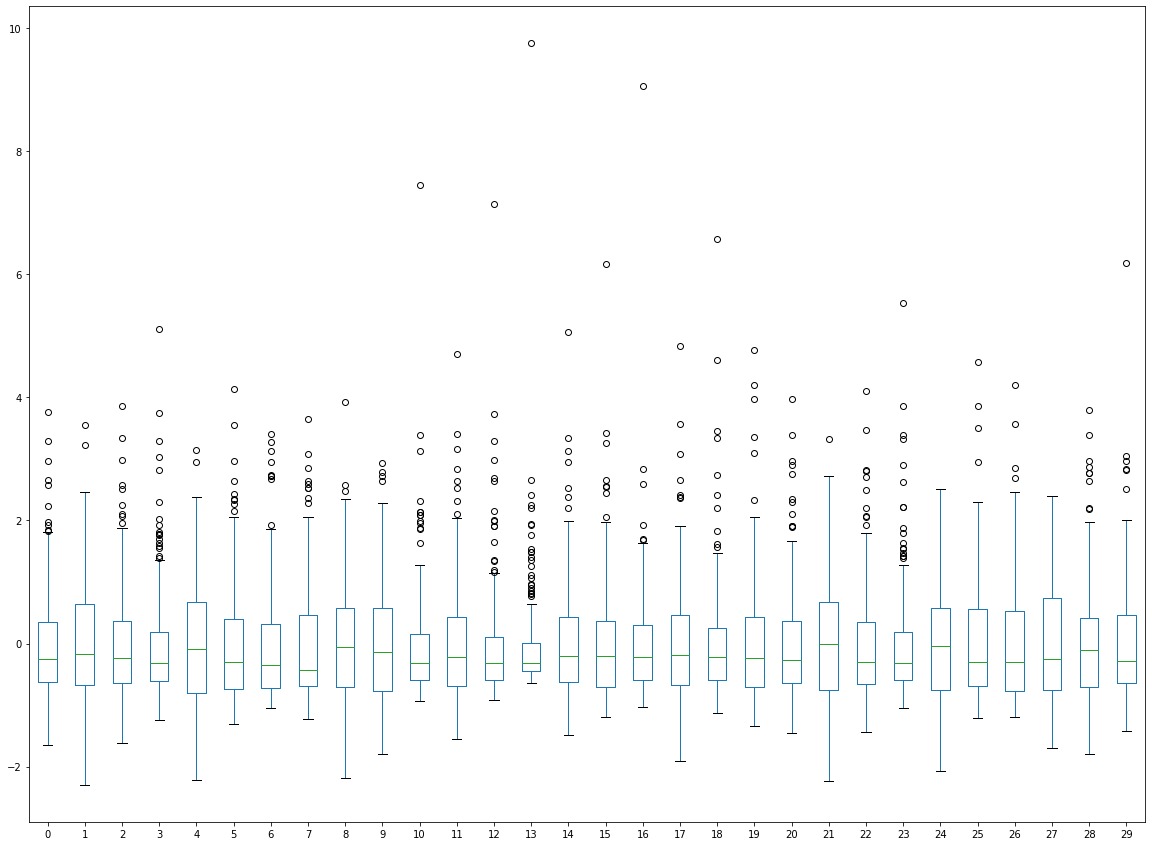

In [0]:
#Visualizing test data after normalization by Z Score
fig = plt.figure(figsize = (20,15))
box = pd.DataFrame(normTest)
box.boxplot(grid=False)

In [0]:
# concatenating ID and Label to normalized train and test data
dtrain = np.concatenate((train[:,0:2],normTrain),axis=1)
dtrain = pd.DataFrame(dtrain,columns=attributes)
#display(dtrain)

dtest = np.concatenate((test[:,0:2],normTest),axis=1)
dtest = pd.DataFrame(dtest,columns=attributes)


We can see from the previous figures, features have nearly the same ranges so the classifiers which depends on the distance between the samples will have better accuracy.

#  **Data Classification and Evaluation**

## **Evaluation** **metrics**




In [0]:
#evaluation metrics
def eval_metrics(y_true,y_pred):
  percision,recall,fscore,support = prfs(y_true,y_pred, labels = detected_class )
  print('accuracy = ' ,acc(y_true,y_pred))
  print ('correctly classified instances = ',acc(y_true,y_pred, normalize=False), 'out of', len(y_true))
  print('labels = ',detected_class,'\n',
        'percision = ',percision,'\n',
        'recall = ',recall,'\n',
        'f1_score = ',fscore,'\n',
        'The number of occurrences of each label = ',support)
  
  #evaluation(Confusion Metrix)
  print("Confusion Metrix:\n",metrics.confusion_matrix(y_true,y_pred))

### **Confusion matrix**

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()    

## **Classification without using hyperparameter tunning**

### Disision tree calssifier

Basic Decision tree classifier constructs a tree with depth =  8
accuracy =  0.9473684210526315
correctly classified instances =  162 out of 171
labels =  ['M' 'B'] 
 percision =  [0.92307692 0.96226415] 
 recall =  [0.9375     0.95327103] 
 f1_score =  [0.93023256 0.95774648] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[102   5]
 [  4  60]]


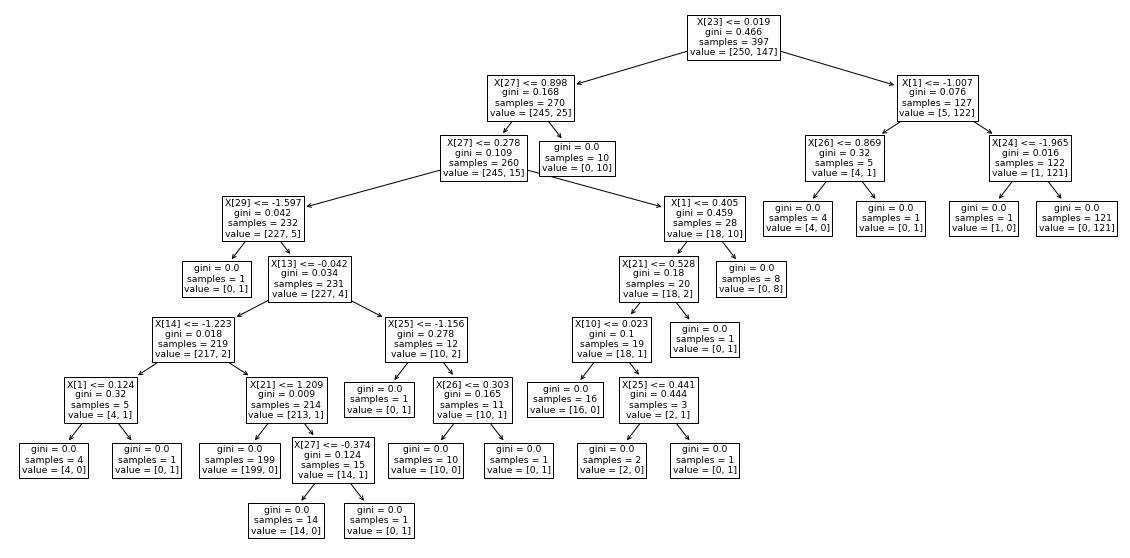

In [0]:
#simple implementation for Decision tree without hyperparameter tunnig
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(random_state=0)
# fitting training data

dt_f = dt_clf.fit(normTrain,train[:,1])

fig = plt.figure(figsize=(20,10))
tree.plot_tree(dt_f)

#depth of the tree
dt_depth = dt_clf.get_depth()
print('Basic Decision tree classifier constructs a tree with depth = ', dt_depth)

#evaluating desicion tree
eval_metrics(test[:,1],dt_clf.predict(normTest))



### AdaBoost Classifier

In [0]:
# AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(random_state=0)

# fitting training data
adb_f = adb_clf.fit(normTrain,train[:,1])


#evaluating AdaBoost
eval_metrics(test[:,1],adb_clf.predict(normTest))


accuracy =  0.9532163742690059
correctly classified instances =  163 out of 171
labels =  ['M' 'B'] 
 percision =  [0.96666667 0.94594595] 
 recall =  [0.90625    0.98130841] 
 f1_score =  [0.93548387 0.96330275] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[105   2]
 [  6  58]]


### Random Forest Classifier

In [0]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

# fitting training data
rf_f = rf_clf.fit(normTrain,train[:,1])

#depth of the tree
#rf_depth = rf_clf.max_depth()
#print('depth = ', rf_depth)

#evaluating RandomForestClassifier
eval_metrics(test[:,1],rf_clf.predict(normTest))

accuracy =  0.9649122807017544
correctly classified instances =  165 out of 171
labels =  ['M' 'B'] 
 percision =  [0.98333333 0.95495495] 
 recall =  [0.921875   0.99065421] 
 f1_score =  [0.9516129  0.97247706] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[106   1]
 [  5  59]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



## **Model Parameter Tuning**

### **Desicion Tree**

In [0]:
#With Hyper Parameters Tuning
#DesicionTree
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=2)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'max_depth' :[4,5,6,7,8,9,10,11,12]}
#Making models with hyper parameters sets
model1 = GridSearchCV(dt_clf, param_grid=params, n_jobs=-1)
#Learning
model1.fit(train[:,2:],train[:,1])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
accuracy =  0.9415204678362573
correctly classified instances =  161 out of 171
labels =  ['M' 'B'] 
 percision =  [0.93548387 0.94495413] 
 recall =  [0.90625    0.96261682] 
 f1_score =  [0.92063492 0.9537037 ] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[103   4]
 [  6  58]]


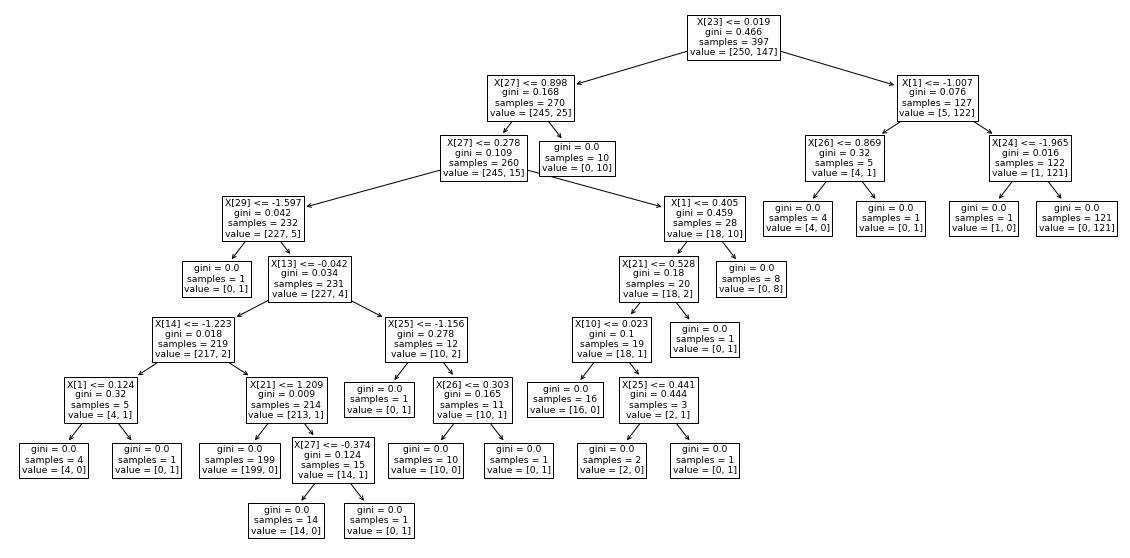

In [0]:
# print best parameter after tuning 
print(model1.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(model1.best_estimator_) 
#Prediction
prediction=model1.predict(test[:,2:])

fig = plt.figure(figsize=(20,10))
tree.plot_tree(dt_f)


#eval metrics
eval_metrics(test[:,1],prediction)

### **Ada Boost**

In [0]:
# defining parameter range 
param_grid = {"learning_rate" : [1,0.5,0.2,0.1,0.05,0.01,0.005,0.002,0.001],
              "n_estimators": [5,10,20,30,40,45,50,55,60,70,100]}  
  
grid = GridSearchCV(adb_clf, param_grid) 
  
# fitting the model for grid search 
grid.fit(train[:,2:],train[:,1]) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
#Prediction
prediction=grid.predict(test[:,2:])
#importing the metrics module

#eval metrics
eval_metrics(test[:,1],prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 1, 'n_estimators': 100}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=0)
accuracy =  0.9707602339181286
correctly classified instances =  166 out of 171
labels =  ['M' 'B'] 
 percision =  [0.98360656 0.96363636] 
 recall =  [0.9375     0.99065421] 
 f1_score =  [0.96       0.97695853] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[106   1]
 [  4  60]]


### **RandomForest**

We will try adjusting the following set of hyperparameters:

    n_estimators = number of trees in the foreset
    max_features = max number of features considered for splitting a node
    max_depth = max number of levels in each decision tree
    min_samples_split = min number of data points placed in a node before the node is split
    min_samples_leaf = min number of data points allowed in a leaf node
    bootstrap = method for sampling data points (with or without replacement)

In [0]:
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini'],
          'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'n_estimators':[2,5,7,9,10,15,20,25,30,40],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7]}
#Making models with hyper parameters sets
model1 = GridSearchCV(rf_clf, param_grid=params, n_jobs=-1)
#learning
model1.fit(train[:,2:],train[:,1])
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
print("Best Estimators:\n",model1.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}
Best Estimators:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [0]:
#Prediction
prediction=model1.predict(test[:,2:])


#eval metrics
eval_metrics(test[:,1],prediction)

accuracy =  0.9649122807017544
correctly classified instances =  165 out of 171
labels =  ['M' 'B'] 
 percision =  [0.98333333 0.95495495] 
 recall =  [0.921875   0.99065421] 
 f1_score =  [0.9516129  0.97247706] 
 The number of occurrences of each label =  [ 64 107]
Confusion Metrix:
 [[106   1]
 [  5  59]]
